<a href="https://colab.research.google.com/github/premanshsharma/Brain-Tumor-Detection/blob/main/Brain_Tumor_Detection_Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Detection and Analysis of different algorithms.

In [1]:
import os
import cv2
import keras 
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageOps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
plt.style.use('dark_background')
# from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
paths_yes = []
for r, d, f in os.walk(r"/content/gdrive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/yes"):
    for file in f:
        if '.jpg' in file:
            paths_yes.append(os.path.join(r, file))

paths_no = []
for r, d, f in os.walk(r"/content/gdrive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/no"):
    for file in f:
        if '.jpg' in file:
            paths_no.append(os.path.join(r, file))

In [4]:
# img_y = cv2.imread("D:\Tumor Detection\BRAIN_MRI_IMAGE_DATA_SET\data sets\yes\y0.jpg")

# Image Preprocessing

## HOG


In [ ]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from skimage import io, color
import matplotlib.pyplot as plt

%matplotlib inline
def give_hog(img):
    #reading the image
#     cv2.imshow('img', img)
#     print(img.shape)
    #creating hog features 
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
#     cv2.imshow('img', hog_image)
#     print(hog_image.shape)
    return hog_image

# give_hog(img_y)
# give_hog(img_n)

## SIFT


In [ ]:
import cv2
def give_sift(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize the SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # Detect and compute keypoints and descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # Draw the detected keypoints on the input image
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)

    # Save the output image
    # cv2.imwrite("output_image.jpg", img_with_keypoints)
    # cv2_imshow(img_with_keypoints)
    return img_with_keypoints

# give_sift(img_y)
# give_sift(img_n)

## ORB

In [ ]:
def give_orb(img):
    # Create ORB object
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = orb.detectAndCompute(img, None)

    # Draw keypoints on the image
    img_keypoints = cv2.drawKeypoints(img, keypoints, None)

    # Display the image with keypoints
    # cv2_imshow(img_keypoints)
    return img_keypoints
# give_orb(img_y)
# give_orb(img_n)

## Connected Component Analysis

In [ ]:
def connected_component_analysis(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply binary thresholding
    # _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    _,thresh = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
    # Apply connected component analysis
    connectivity = 4  # 8-way (or) 4-way connectivity
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
    # Loop through each component
    output = np.zeros(img.shape, dtype="uint8")
    area_arr = []
    for i in range(1, num_labels):
        area_arr.append(stats[i, cv2.CC_STAT_AREA])
    area_arr.sort(reverse=True)
    output = np.zeros(img.shape, dtype="uint8")
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]  
        # print(area)
        if (area in area_arr[:5]): # - 1) and (area < max(area_arr) + 1):
        # if area > 0:
            # print(area)
            # Labels stores all the IDs of the components on the each pixel
            # It has the same dimension as the threshold
            # So we'll check the component
            # then convert it to 255 value to mark it white
            componentMask = (labels == i).astype("uint8") * 255
            
            # Creating the Final output mask
            output = cv2.bitwise_or(output, componentMask)
            # cv2_imshow(output)
    return output

# for img in data:
#     connected_component_analysis(img)
# connected_component_analysis(img_n)
# img_y = cv2.imread('/content/drive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/yes/y0.jpg')
# connected_component_analysis(img_y)

## PCA

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

def give_pca(img, principle_components):
    # Splitting the image in R,G,B arrays.
    # pca = PCA(principle_components)
    # transformed = pca.fit_transform(img)
    # inverted = pca.inverse_transform(transformed)
    # cv2_imshow(inverted)
    # plt.imshow(inverted)
    # return
    # img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    blue,green,red = cv2.split(img)
    #initialize PCA with first 20 principal components
    pca = PCA(principle_components)
    
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
    
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
    
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)
    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
    #viewing the compressed image
#     cv2_imshow(img_compressed)
    # plt.imshow(img_compressed)
    return img_compressed

def give_pcag(img, principle_components):
    # Splitting the image in R,G,B arrays.
    pca = PCA(principle_components)
    transformed = pca.fit_transform(img)
    inverted = pca.inverse_transform(transformed)
#     cv2_imshow(inverted)
    # plt.imshow(inverted)
    return inverted

# Neural Network Implementation:- VGG16, VGG19

## Dataset Input

In [5]:
data = []
result = []
def image_input(paths, result_int):
    i = 0
    for path in paths:
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224))
#         print(result_int, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            data.append(np.array(img))
            result.append([result_int])

image_input(paths_yes, 0)
image_input(paths_no, 1)

In [6]:
data = np.array(data)
data.shape

(3000, 224, 224, 3)

In [7]:
result = np.array(result)
result = result.reshape(3000,1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle = True, random_state = 8)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state= 8)

In [9]:
x_train, x_val, x_test = np.array(x_train), np.array(x_val), np.array(x_test)
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)

In [10]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(1800, 224, 224, 3) (1800, 1) (600, 224, 224, 3) (600, 1) (600, 224, 224, 3) (600, 1)


In [11]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_train, y_val = np.array(y_train), np.array(y_val)

In [12]:
y_test = to_categorical(y_test, num_classes=2)
y_test = np.array(y_test)

In [13]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)

In [14]:
tf.config.run_functions_eagerly(True)

## VGG16

In [15]:
# gpu_options = tf.GPUOptions(allow_growth=True)
# session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))|
model_VGG_16 = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=max,
    classes=2,
    classifier_activation="sigmoid",
)

opt = Adam(lr=0.001)
model_VGG_16.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history_vgg16 = model_VGG_16.fit(
    x_train, y_train, 
    epochs=100, batch_size=40, 
    validation_data=(x_val, y_val), callbacks=[es]
)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
45/45 [==============================] - 63s 881ms/step - loss: 181.5002 - accuracy: 0.5872 - val_loss: 0.5999 - val_accuracy: 0.6500
Epoch 2/100
45/45 [==============================] - 40s 890ms/step - loss: 0.5930 - accuracy: 0.6933 - val_loss: 0.6037 - val_accuracy: 0.7217
Epoch 3/100
45/45 [==============================] - 39s 878ms/step - loss: 0.5689 - accuracy: 0.7161 - val_loss: 0.4984 - val_accuracy: 0.7583
Epoch 4/100
45/45 [==============================] - 41s 906ms/step - loss: 0.5268 - accuracy: 0.7228 - val_loss: 0.5533 - val_accuracy: 0.7633
Epoch 5/100
45/45 [==============================] - 41s 906ms/step - loss: 0.4699 - accuracy: 0.7839 - val_loss: 0.4694 - val_accuracy: 0.7850
Epoch 6/100
45/45 [==============================] - 41s 907ms/step - loss: 0.3971 - accuracy: 0.8283 - val_loss: 0.4536 - val_accuracy: 0.8350
Epoch 7/100
45/45 [==============================] - 39s 873ms/step - loss: 0.3483 - accuracy: 0.8583 - val_loss: 0.3721 - val_accurac

In [17]:
print("Evaluate on test data")
results_vgg16 = model_VGG_16.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results_vgg16)

Evaluate on test data
10/10 [==============================] - 15s 713ms/step - loss: 0.2447 - accuracy: 0.9317
test loss, test acc: [0.24471415579319, 0.9316666722297668]


## VGG19

In [47]:
model_VGG_19 = tf.keras.applications.VGG19(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=max,
    classes=2,
    classifier_activation="sigmoid",
)

opt = Adam(lr=0.001)
model_VGG_19.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
history_vgg19 = model_VGG_19.fit(x_train, y_train, epochs = 100, batch_size = 40, validation_data = (x_val, y_val), callbacks=[es])

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
45/45 [==============================] - 45s 1s/step - loss: 0.7383 - accuracy: 0.5394 - val_loss: 0.6745 - val_accuracy: 0.6583
Epoch 2/100
45/45 [==============================] - 44s 985ms/step - loss: 0.7008 - accuracy: 0.5933 - val_loss: 1.2326 - val_accuracy: 0.4550
Epoch 3/100
45/45 [==============================] - 45s 1s/step - loss: 0.7421 - accuracy: 0.5356 - val_loss: 0.6835 - val_accuracy: 0.4450
Epoch 4/100
45/45 [==============================] - 45s 1s/step - loss: 0.6309 - accuracy: 0.6467 - val_loss: 0.6523 - val_accuracy: 0.4667
Epoch 5/100
45/45 [==============================] - 44s 983ms/step - loss: 0.6027 - accuracy: 0.6783 - val_loss: 0.5733 - val_accuracy: 0.7683
Epoch 6/100
45/45 [==============================] - 44s 986ms/step - loss: 0.6168 - accuracy: 0.6556 - val_loss: 0.4996 - val_accuracy: 0.7500
Epoch 7/100
45/45 [==============================] - 45s 1s/step - loss: 0.5694 - accuracy: 0.7122 - val_loss: 0.4853 - val_accuracy: 0.7883
Epoc

In [56]:
print("Evaluate on test data")
results_vgg19 = model_VGG_19.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results_vgg19)

Evaluate on test data
10/10 [==============================] - 4s 383ms/step - loss: 0.2307 - accuracy: 0.9517
test loss, test acc: [0.23067057132720947, 0.9516666531562805]


## Inception Model

In [25]:
model_iv = tf.keras.applications.InceptionV3(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=max,
    classes=2,
    classifier_activation="softmax",
)
opt = Adam(lr=0.001)
model_iv.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
history_iv = model_iv.fit(x_train, y_train, epochs = 100, batch_size = 40, validation_data = (x_val, y_val), callbacks=[es])

Epoch 1/100
45/45 [==============================] - 45s 880ms/step - loss: 0.6030 - accuracy: 0.7167 - val_loss: 40.7406 - val_accuracy: 0.6450
Epoch 2/100
45/45 [==============================] - 42s 930ms/step - loss: 0.4044 - accuracy: 0.8317 - val_loss: 18.8812 - val_accuracy: 0.6900
Epoch 3/100
45/45 [==============================] - 40s 889ms/step - loss: 0.3223 - accuracy: 0.8661 - val_loss: 1.6929 - val_accuracy: 0.5400
Epoch 4/100
45/45 [==============================] - 40s 887ms/step - loss: 0.2199 - accuracy: 0.9122 - val_loss: 1.2743 - val_accuracy: 0.7050
Epoch 5/100
45/45 [==============================] - 40s 885ms/step - loss: 0.2515 - accuracy: 0.9106 - val_loss: 0.7588 - val_accuracy: 0.8317
Epoch 6/100
45/45 [==============================] - 40s 884ms/step - loss: 0.1649 - accuracy: 0.9422 - val_loss: 0.4080 - val_accuracy: 0.9000
Epoch 7/100
45/45 [==============================] - 43s 949ms/step - loss: 0.1415 - accuracy: 0.9506 - val_loss: 0.5671 - val_accurac

In [28]:
print("Evaluate on test data")
results_iv = model_iv.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results_iv)

Evaluate on test data


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 2s 191ms/step - loss: 0.1528 - accuracy: 0.9733
test loss, test acc: [0.15281496942043304, 0.9733333587646484]


In [49]:
# print(history)
def plot_graph_of_history(histories, arch_name, epoch_range):
    for history in range(len(histories)):
        i = history
        history = histories[i]
        loss_train = history.history['accuracy']
        loss_val = history.history['val_accuracy']
        epochs = range(1,epoch_range)
        plt.plot(epochs[:len(loss_train)], loss_train, label='Training accuracy {}'.format(arch_name[i]))
        plt.plot(epochs[:len(loss_val)], loss_val, label='validation accuracy {}'.format(arch_name[i]))
        plt.xlim(1, epoch_range + 1)
        plt.title('Training and Validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
    plt.show()

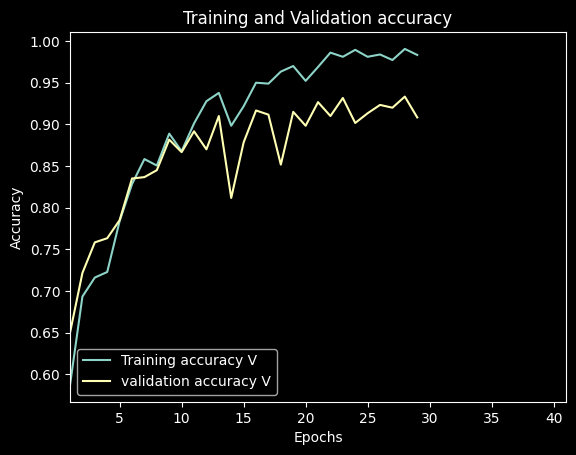

In [50]:
plot_graph_of_history([history_vgg16], 'VGG16', 40)

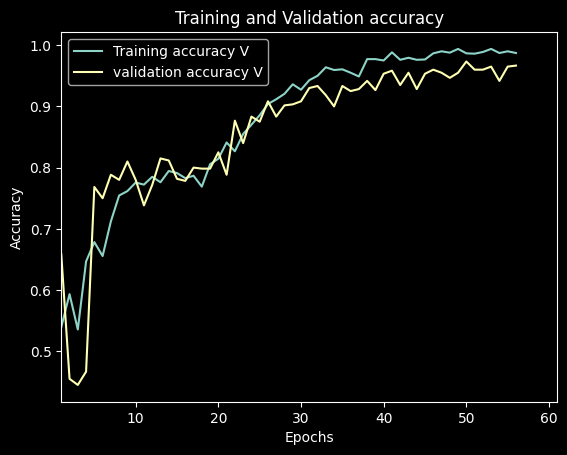

In [57]:
plot_graph_of_history([history_vgg19], 'VGG19', 60)

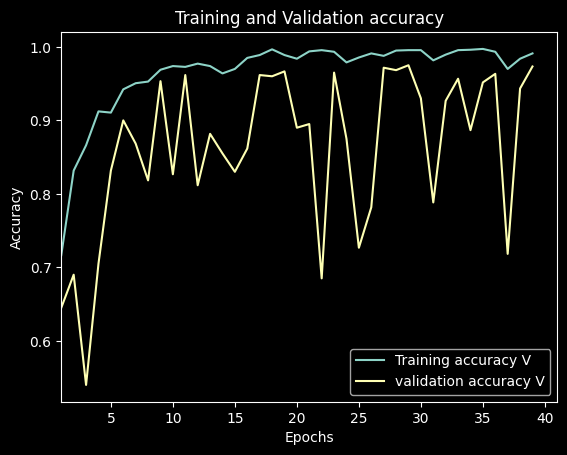

In [52]:
plot_graph_of_history([history_iv], 'VGG19', 40)

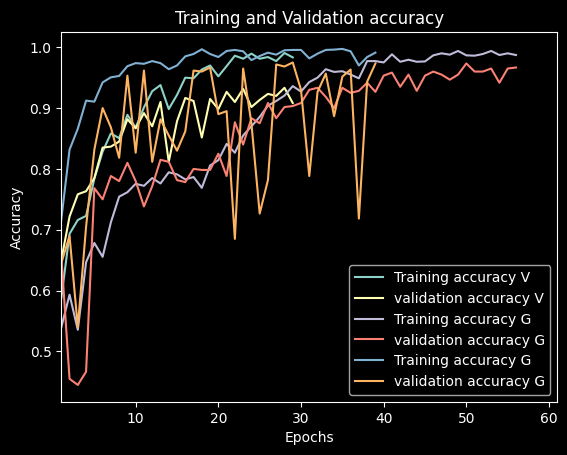

In [58]:
plot_graph_of_history([history_vgg16, history_vgg19, history_iv], 'VGG16, VGG19 and Inception V', 60)

# Machine Learning Algorithms Implementation

## K Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=3):
      _scoring = ['accuracy', 'recall']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              }
# "Training Recall scores": results['train_recall'],
    #           "Mean Training Recall": results['train_recall'].mean(),
    # "Validation Recall scores": results['test_recall'],
    #           "Mean Validation Recall": results['test_recall'].mean()

In [ ]:
# def plot_result(x_label, y_label, plot_title, train_data, val_data):
#         # Set size of plot
#         labels = ["1st Fold", "2nd Fold", "3rd Fold"]
#         X_axis = np.arange(len(labels))
#         ax = plt.gca()
#         plt.ylim(0.40000, 1)
#         plt.bar(train_data, color='c', label='Training')
#         plt.bar(val_data, color='w', label='Validation')
#         plt.title(plot_title)
#         plt.xticks(X_axis, labels)
#         plt.xlabel(x_label)
#         plt.ylabel(y_label)
#         plt.legend()
#         plt.grid(True)
#         plt.show()
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        # plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        # plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='c', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='w', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
import matplotlib.pyplot as plt
def plot_acc(x, x_name, x_val):
    plt.bar(x_val, x, color='c')
    plt.xlabel(x_name)
    plt.ylabel('Accuracy')
    plt.title('Accuracy analysis Graph')
    plt.ylim(0, 101)
    plt.show()

    
# plot_acc([20, 30, 69, 40, 51], 'k', [1, 2, 3, 4, 5])#['1', '2', '3', '4', '5'])

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr):
    # Train the KNN algorithm
    for i in range(1, 6):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_trainlr, y_trainlr)
        # Predict the classes of the testing data
        y_pred = knn.predict(x_testlr)
        # Evaluate the performance of the algorithm
        accuracy = accuracy_score(y_testlr, y_pred)
        # recall = recall_score(y_testlr, y_pred)
        cm = confusion_matrix(y_testlr,y_pred)
        print('accuracy of KNN with n =', i, 'is', accuracy)
        # print('recall of KNN with n =', i, 'is', recall)
        print('confusion matrix of KNN with n =', i, 'is', cm)
        print()
        del knn, y_pred

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def k_n_n_c(datalr, result_lr):
    # Train the KNN algorithm
    accu = []
    for i in range(1, 6):
        print('n =', i)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn = cross_validation(knn, datalr, resultlr, 3)
        print(knn)
        # Plot Accuracy Result
        model_name = "KNN, n={}".format(i)
        accu.append(knn['Mean Validation Accuracy'])
        plot_result(model_name,
                    "Accuracy",
                    "Accuracy scores in 3 Folds",
                    knn["Training Accuracy scores"],
                    knn["Validation Accuracy scores"])
        del knn
    plot_acc(accu, 'k', [i for i in range(1, 6)])
        # plot_result(model_name,
        #             "Recall",
        #             "Recall scores in 5 Folds",
        #             knn["Training Recall scores"],
        #             knn["Validation Recall scores"])

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
def logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr):
    solvers = ['lbfgs', 'liblinear', 'newton-cg']
#     ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
    for sol in solvers:
        logisticRegr = LogisticRegression(solver=sol, max_iter=100000)
        logisticRegr.fit(x_trainlr, y_trainlr)
        y_pred = logisticRegr.predict(x_testlr)
        accuracy = accuracy_score(y_testlr, y_pred)
        recall = recall_score(y_testlr, y_pred)
        cm = confusion_matrix(y_testlr,y_pred)
        print('accuracy of LogisticRegression with solver =', sol, 'is', accuracy)
        print('recall of LogisticRegression with solver =', sol, 'is', recall)
        print('confusion matrix of LogisticRegression with solver =', sol, 'is', cm)
        print()
        del logisticRegr, y_pred

In [ ]:
from sklearn.linear_model import LogisticRegression
def logistic_regression_c(datalr, resultlr):
    solvers = ['lbfgs', 'liblinear', 'newton-cg']
#     ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
    accu = []
    for sol in solvers:
        print('solver =', sol)
        logisticRegr = LogisticRegression(solver=sol, max_iter=100000)
        logisticRegr = cross_validation(logisticRegr, datalr, resultlr, 3)
        print(logisticRegr)
        accu.append(logisticRegr['Mean Validation Accuracy'])
        model_name = "logistic_regression with solver {}".format(sol)
        plot_result(model_name,
                    "Accuracy",
                    "Accuracy scores in 3 Folds",
                    logisticRegr["Training Accuracy scores"],
                    logisticRegr["Validation Accuracy scores"])
        # plot_result(model_name,
        #             "Recall",
        #             "Recall scores in 5 Folds",
        #             logisticRegr["Training Recall scores"],
        #             logisticRegr["Validation Recall scores"])
        del logisticRegr
    plot_acc(accu, 'Solver', solvers)

## SVM

In [ ]:
from sklearn.svm import SVC
def s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr):
    kernels = ['linear', 'poly', 'sigmoid']
    for ker in kernels:
        svr = SVC(kernel = ker,C = 1000)
        svr.fit(x_trainlr,y_trainlr)
        y_pred = svr.predict(x_testlr)
        accuracy = accuracy_score(y_testlr, y_pred)
        recall = recall_score(y_testlr, y_pred)
        cm = confusion_matrix(y_testlr,y_pred)
        print('accuracy of SVM with kernel =', ker, 'is', accuracy)
        print('recall of SVM with kernel =', ker, 'is', recall)
        print('confusion matrix of SVM with kernel =', ker, 'is', cm)
        print()
        del svr, y_pred

In [ ]:
from sklearn.svm import SVC
def s_v_m_c(datalr, resultlr):
    accu = []
    kernels = ['linear', 'poly', 'sigmoid']
    for ker in kernels:
        svr = SVC(kernel = ker,C = 1000)
        svr = cross_validation(svr, datalr, resultlr, 3)
        print('kernel =', ker)
        print(svr)
        model_name = "svm with kernel {}".format(ker)
        accu.append(svr['Mean Validation Accuracy'])
        plot_result(model_name,
                    "Accuracy",
                    "Accuracy scores in 3 Folds",
                    svr["Training Accuracy scores"],
                    svr["Validation Accuracy scores"])
        # plot_result(model_name,
        #             "Recall",
        #             "Recall scores in 5 Folds",
        #             svr["Training Recall scores"],
        #             svr["Validation Recall scores"])
        del svr
    plot_acc(accu, 'Kernel', kernels)

## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
def n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr):
    # Train Naive Bayes classifier
    clf = GaussianNB()
    clf.fit(x_trainlr, y_trainlr)
    # Predict labels for testing set
    y_pred = clf.predict(x_testlr)
    accuracy = accuracy_score(y_testlr, y_pred)
    recall = recall_score(y_testlr, y_pred)
    cm = confusion_matrix(y_testlr,y_pred)
    print('accuracy of Naive Bayes Classifier is', accuracy)
    print('recall of Naive Bayes Classifier is', recall)
    print('confusion matrix of Naive Bayes Classifier is', cm)
    print()
    del clf

In [ ]:
from sklearn.naive_bayes import GaussianNB
def n_b_g_c(datalr, resultlr):
    # Train Naive Bayes classifier
    clf = GaussianNB()
    clf = cross_validation(clf, datalr, resultlr, 3)
    model_name = "naive_bayes"
    print(clf)
    plot_result(model_name,
                "Accuracy",
                "Accuracy scores in 3 Folds",
                clf["Training Accuracy scores"],
                clf["Validation Accuracy scores"])
    # plot_result(model_name,
    #             "Recall",
    #             "Recall scores in 5 Folds",
    #             clf["Training Recall scores"],
    #             clf["Validation Recall scores"])
    del clf

## Creating Dataset For Training

## Normal Image

In [ ]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224))
        # print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            datalr.append(np.array(img))
            resultlr.append(op)


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
print(len(datalr), len(resultlr))

datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

3000 3000

(3000, 224, 672)

(3000, 150528)

3000 3000

2250 750


n = 1

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.907, 0.962, 0.941]), 'Mean Validation Accuracy': 93.66666666666667}


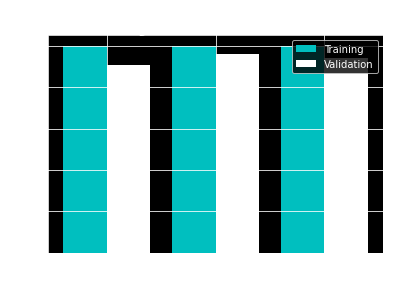

n = 2

{'Training Accuracy scores': array([0.9935, 0.998 , 0.9905]), 'Mean Training Accuracy': 99.4, 'Validation Accuracy scores': array([0.918, 0.961, 0.937]), 'Mean Validation Accuracy': 93.86666666666666}


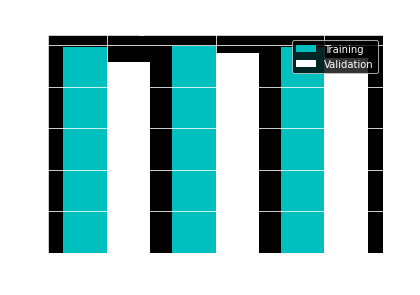

n = 3

{'Training Accuracy scores': array([0.9645, 0.9795, 0.9585]), 'Mean Training Accuracy': 96.74999999999999, 'Validation Accuracy scores': array([0.844, 0.946, 0.854]), 'Mean Validation Accuracy': 88.13333333333334}


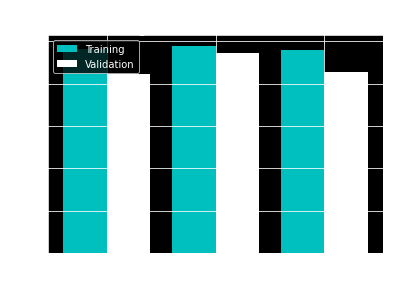

n = 4

{'Training Accuracy scores': array([0.963 , 0.9815, 0.9535]), 'Mean Training Accuracy': 96.60000000000001, 'Validation Accuracy scores': array([0.848, 0.94 , 0.858]), 'Mean Validation Accuracy': 88.2}


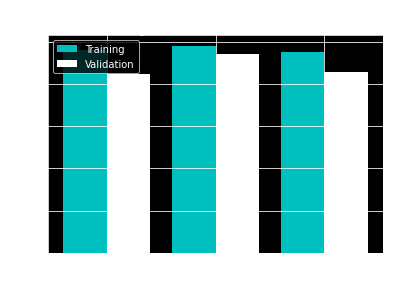

n = 5

{'Training Accuracy scores': array([0.9275, 0.922 , 0.8985]), 'Mean Training Accuracy': 91.6, 'Validation Accuracy scores': array([0.776, 0.863, 0.793]), 'Mean Validation Accuracy': 81.06666666666666}


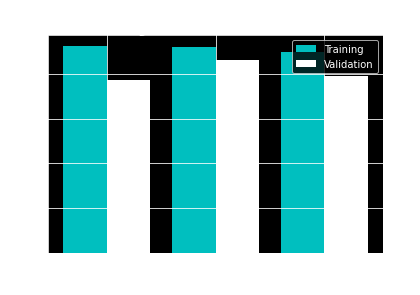

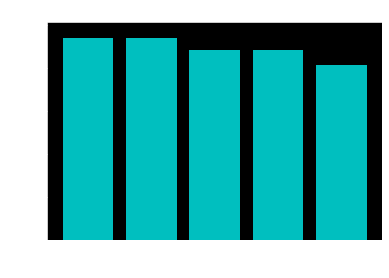

kernel = linear

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.934, 0.949, 0.965]), 'Mean Validation Accuracy': 94.93333333333332}


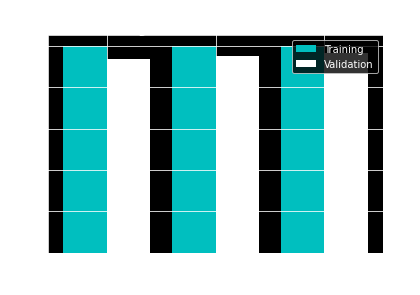

kernel = poly

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.915, 0.946, 0.968]), 'Mean Validation Accuracy': 94.3}


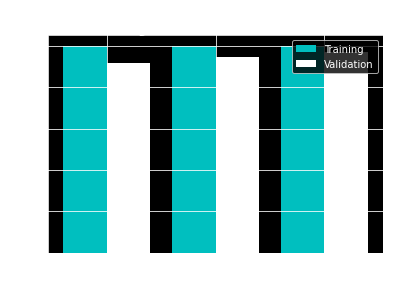

kernel = rbf

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.942, 0.951, 0.978]), 'Mean Validation Accuracy': 95.69999999999999}


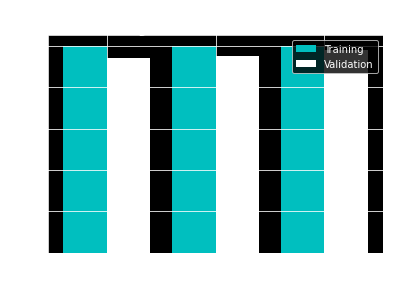

kernel = sigmoid

{'Training Accuracy scores': array([0.7205, 0.605 , 0.365 ]), 'Mean Training Accuracy': 56.35, 'Validation Accuracy scores': array([0.542, 0.794, 0.447]), 'Mean Validation Accuracy': 59.43333333333334}


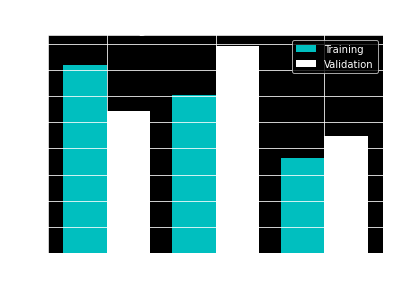

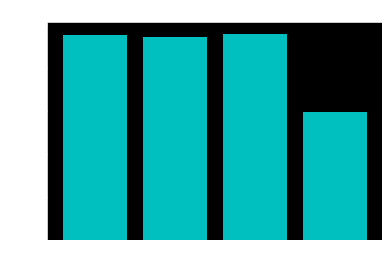

{'Training Accuracy scores': array([0.7225, 0.7015, 0.698 ]), 'Mean Training Accuracy': 70.73333333333332, 'Validation Accuracy scores': array([0.586, 0.768, 0.65 ]), 'Mean Validation Accuracy': 66.8}


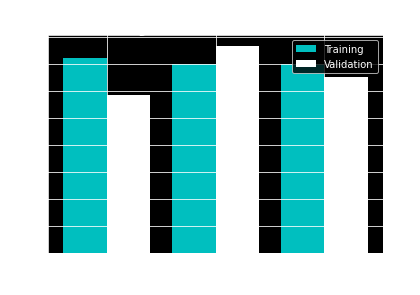

solver = lbfgs

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.937, 0.953, 0.968]), 'Mean Validation Accuracy': 95.26666666666667}


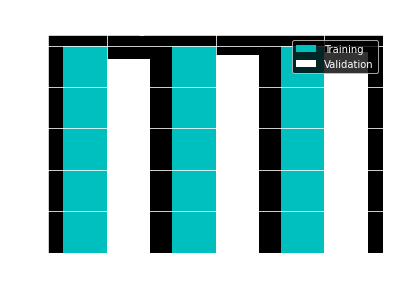

solver = liblinear

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.934, 0.953, 0.968]), 'Mean Validation Accuracy': 95.16666666666667}


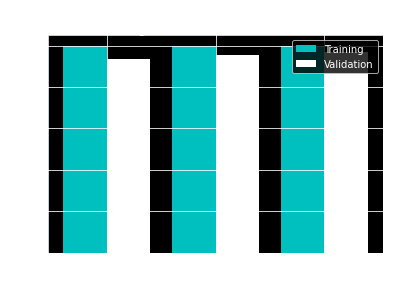

solver = newton-cg

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.936, 0.953, 0.968]), 'Mean Validation Accuracy': 95.23333333333333}


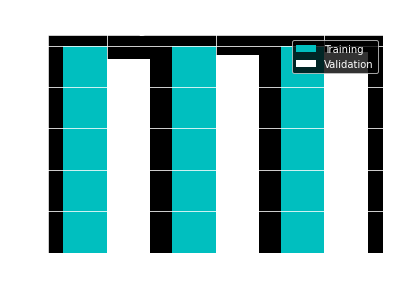

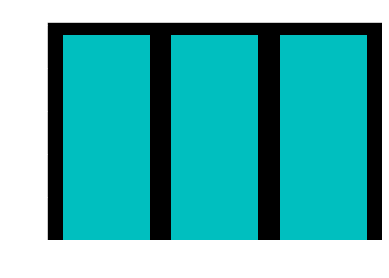

In [ ]:
# k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
# logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
# s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
# n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)
k_n_n_c(datalr, resultlr)
s_v_m_c(datalr, resultlr)
n_b_g_c(datalr, resultlr)
logistic_regression_c(datalr, resultlr)

In [ ]:
del datalr, resultlr

## HOG

In [ ]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img_hog = give_hog(img)
        img_hog = cv2.resize(img_hog, (224, 224))
        img = cv2.resize(img, (224, 224))
        # print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            img_hog = np.concatenate([img_hog, img_hog, img_hog], axis=1)
            img_hog = np.array(img_hog)
#             print(img.shape, img_hog.shape)
            img = np.concatenate([img, img_hog], axis=1)
#             print(img.shape, np.concatenate([img_hog, img_hog], axis=0).shape)
            datalr.append(np.array(img))
            resultlr.append(op)
#             break


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

3000 3000

(3000, 224, 1344)

(3000, 301056)

3000 3000

2250 750


n = 1

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.907, 0.96 , 0.943]), 'Mean Validation Accuracy': 93.66666666666667}


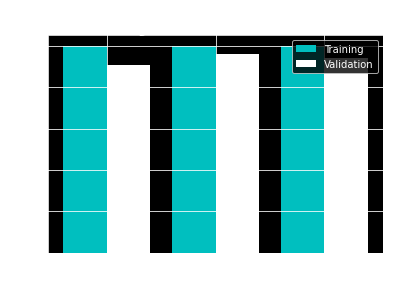

n = 2

{'Training Accuracy scores': array([0.9935, 0.998 , 0.9905]), 'Mean Training Accuracy': 99.4, 'Validation Accuracy scores': array([0.92 , 0.959, 0.937]), 'Mean Validation Accuracy': 93.86666666666666}


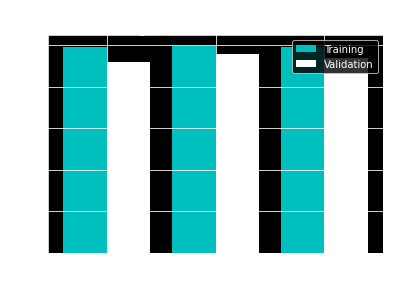

n = 3

{'Training Accuracy scores': array([0.965 , 0.9795, 0.9595]), 'Mean Training Accuracy': 96.8, 'Validation Accuracy scores': array([0.843, 0.944, 0.857]), 'Mean Validation Accuracy': 88.13333333333334}


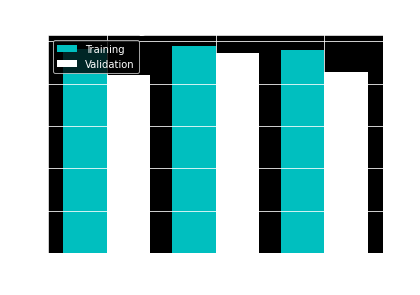

n = 4

{'Training Accuracy scores': array([0.9635, 0.982 , 0.9545]), 'Mean Training Accuracy': 96.66666666666667, 'Validation Accuracy scores': array([0.851, 0.939, 0.86 ]), 'Mean Validation Accuracy': 88.33333333333333}


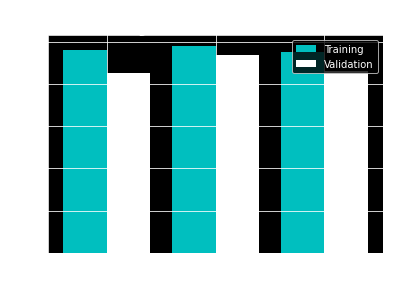

n = 5

{'Training Accuracy scores': array([0.9275, 0.9265, 0.901 ]), 'Mean Training Accuracy': 91.83333333333333, 'Validation Accuracy scores': array([0.781, 0.866, 0.794]), 'Mean Validation Accuracy': 81.36666666666666}


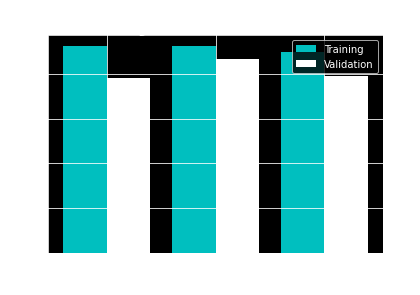

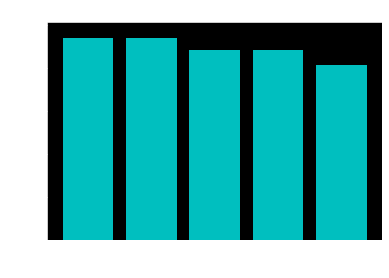

kernel = linear

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.936, 0.947, 0.969]), 'Mean Validation Accuracy': 95.06666666666666}


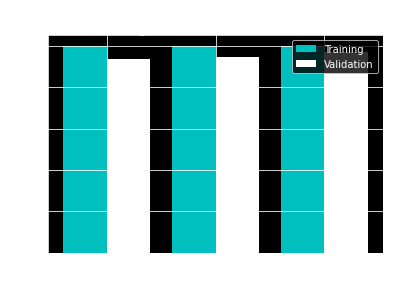

kernel = poly

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.919, 0.947, 0.968]), 'Mean Validation Accuracy': 94.46666666666667}


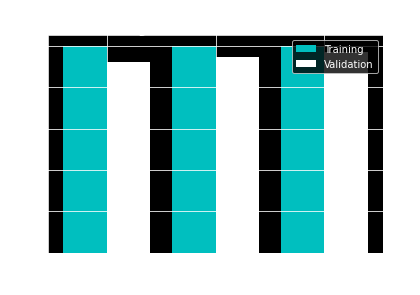

kernel = rbf

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.942, 0.95 , 0.979]), 'Mean Validation Accuracy': 95.7}


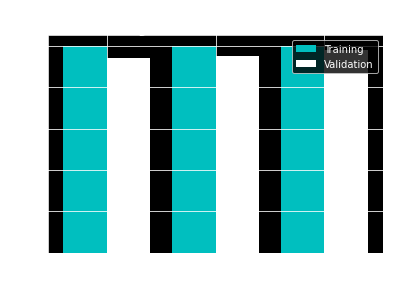

kernel = sigmoid

{'Training Accuracy scores': array([0.716 , 0.6005, 0.679 ]), 'Mean Training Accuracy': 66.51666666666667, 'Validation Accuracy scores': array([0.527, 0.787, 0.599]), 'Mean Validation Accuracy': 63.76666666666667}


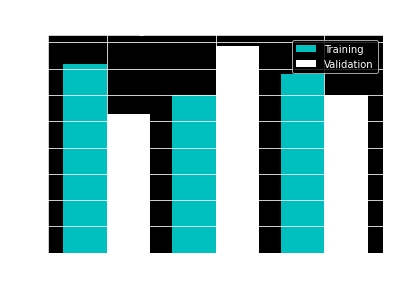

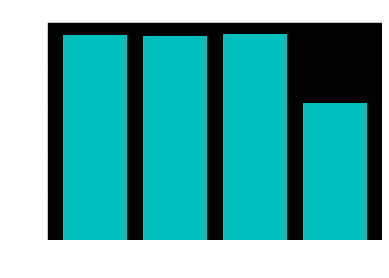

{'Training Accuracy scores': array([0.8585, 0.8865, 0.8495]), 'Mean Training Accuracy': 86.48333333333333, 'Validation Accuracy scores': array([0.801, 0.82 , 0.813]), 'Mean Validation Accuracy': 81.13333333333334}


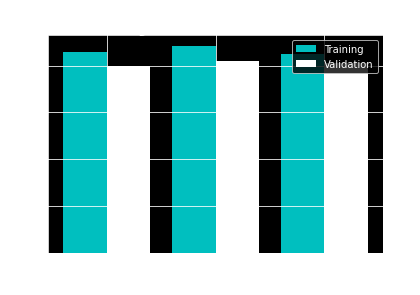

solver = lbfgs

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.939, 0.951, 0.965]), 'Mean Validation Accuracy': 95.16666666666667}


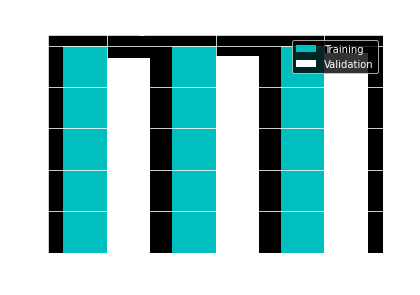

solver = liblinear

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.94 , 0.948, 0.967]), 'Mean Validation Accuracy': 95.16666666666667}


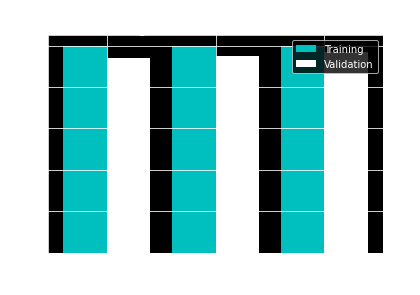

solver = newton-cg

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.939, 0.95 , 0.966]), 'Mean Validation Accuracy': 95.16666666666666}


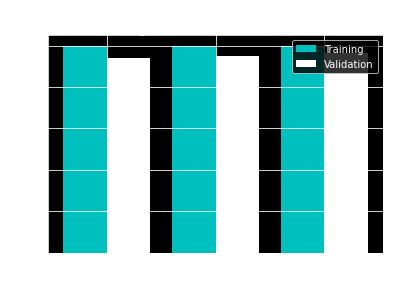

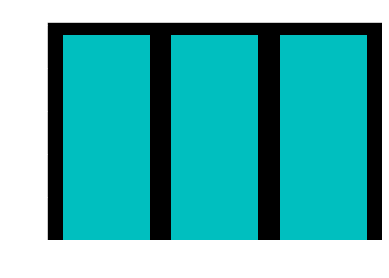

In [ ]:
# k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
# logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
# s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
# n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)
k_n_n_c(datalr, resultlr)
s_v_m_c(datalr, resultlr)
n_b_g_c(datalr, resultlr)
logistic_regression_c(datalr, resultlr)

In [ ]:
del datalr, resultlr

## SIFT

In [ ]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224))
        img_sift = give_sift(img)
        img_sift = cv2.resize(img_sift, (224, 224))
        # print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
#             print(img.shape, img_sift.shape)
            img = cv2.vconcat((img, img_sift))
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            datalr.append(np.array(img))
            resultlr.append(op)
#             break
        # print(op, i, img.shape)


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

n = 1

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.9  , 0.953, 0.942]), 'Mean Validation Accuracy': 93.16666666666666}


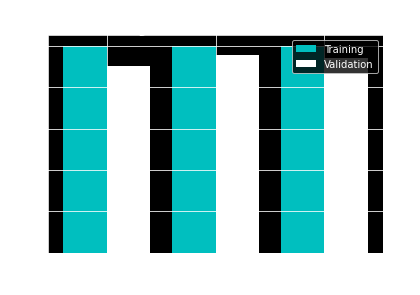

n = 2

{'Training Accuracy scores': array([0.9925, 0.9965, 0.99  ]), 'Mean Training Accuracy': 99.3, 'Validation Accuracy scores': array([0.912, 0.95 , 0.94 ]), 'Mean Validation Accuracy': 93.4}


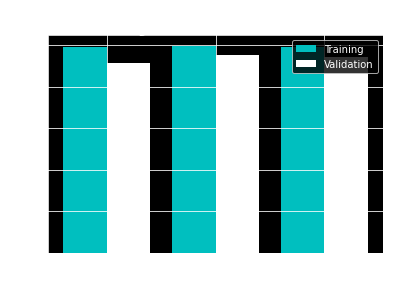

n = 3

{'Training Accuracy scores': array([0.967, 0.984, 0.961]), 'Mean Training Accuracy': 97.06666666666666, 'Validation Accuracy scores': array([0.842, 0.938, 0.861]), 'Mean Validation Accuracy': 88.03333333333333}


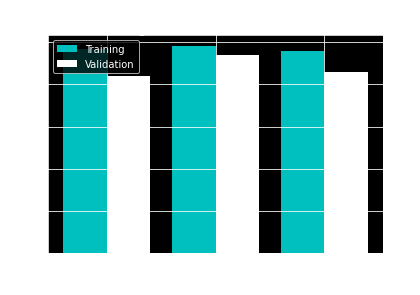

n = 4

{'Training Accuracy scores': array([0.969 , 0.984 , 0.9585]), 'Mean Training Accuracy': 97.05, 'Validation Accuracy scores': array([0.858, 0.932, 0.864]), 'Mean Validation Accuracy': 88.46666666666665}


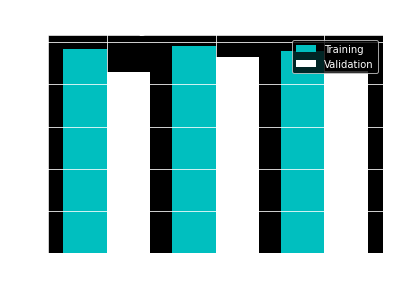

n = 5

{'Training Accuracy scores': array([0.933 , 0.9375, 0.909 ]), 'Mean Training Accuracy': 92.65, 'Validation Accuracy scores': array([0.789, 0.865, 0.812]), 'Mean Validation Accuracy': 82.2}


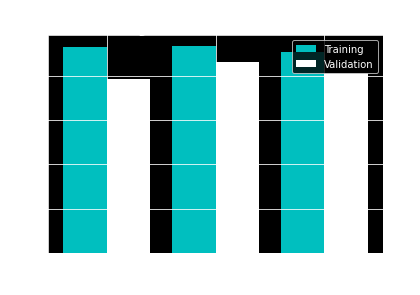

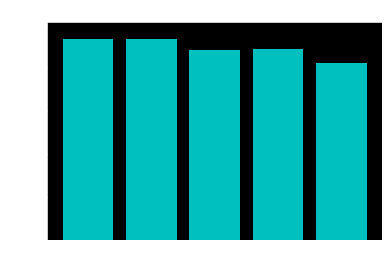

kernel = linear

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.928, 0.946, 0.967]), 'Mean Validation Accuracy': 94.7}


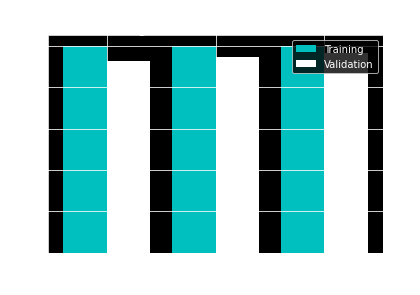

kernel = poly

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.905, 0.945, 0.952]), 'Mean Validation Accuracy': 93.4}


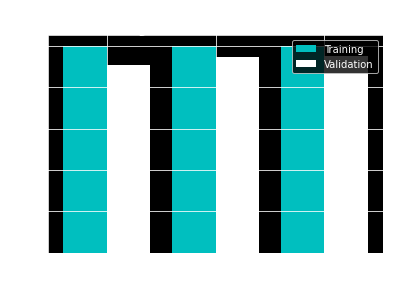

kernel = sigmoid

{'Training Accuracy scores': array([0.7275, 0.614 , 0.3615]), 'Mean Training Accuracy': 56.766666666666666, 'Validation Accuracy scores': array([0.537, 0.795, 0.44 ]), 'Mean Validation Accuracy': 59.06666666666667}


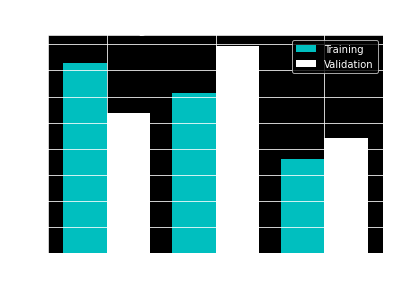

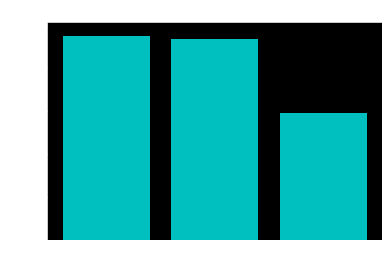

{'Training Accuracy scores': array([0.722, 0.703, 0.701]), 'Mean Training Accuracy': 70.86666666666666, 'Validation Accuracy scores': array([0.593, 0.763, 0.651]), 'Mean Validation Accuracy': 66.89999999999999}


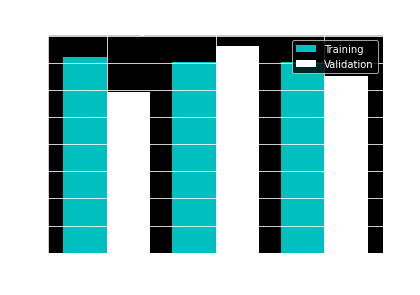

solver = lbfgs

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.927, 0.944, 0.967]), 'Mean Validation Accuracy': 94.60000000000001}


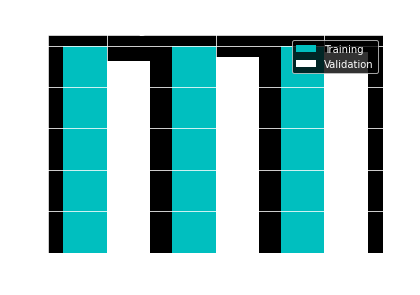

solver = liblinear

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.926, 0.947, 0.969]), 'Mean Validation Accuracy': 94.73333333333333}


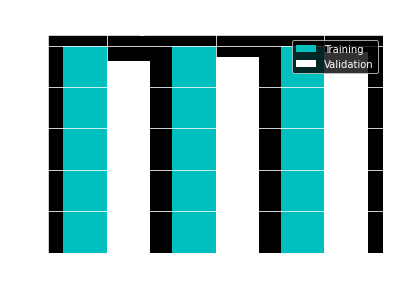

solver = newton-cg


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

Traceback (most recent call last):

  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score

    estimator.fit(X_train, y_train, **fit_params)

  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1406, in fit

    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,

  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__

    if self.dispatch_one_batch(iterator):

  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch

    self._dispatch(tasks)

  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch

    job = self._backend.apply_async(b

{'Training Accuracy scores': array([ 1., nan,  1.]), 'Mean Training Accuracy': nan, 'Validation Accuracy scores': array([0.928,   nan, 0.967]), 'Mean Validation Accuracy': nan}


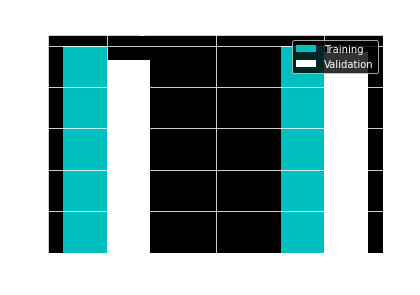

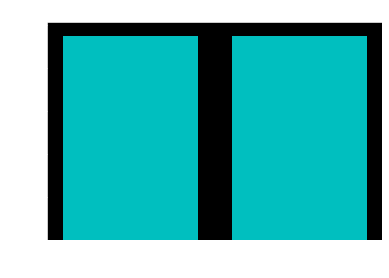

In [ ]:
# k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
# logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
# s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
# n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)
k_n_n_c(datalr, resultlr)
s_v_m_c(datalr, resultlr)
n_b_g_c(datalr, resultlr)
logistic_regression_c(datalr, resultlr)

In [ ]:
logistic_regression_c(datalr, resultlr)

In [ ]:
del datalr, resultlr

## ORB

In [ ]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224))
        img_orb = give_orb(img)
        img_orb = cv2.resize(img_orb, (224, 224))
        # print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            # print(img.shape, img_sift.shape, img_orb.shape)
            img = cv2.vconcat((img, img_orb))
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            datalr.append(np.array(img))
            resultlr.append(op)
        # print(op, i, img.shape)
#             break


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

3000 3000

(3000, 448, 672)

(3000, 301056)

3000 3000

2250 750


n = 1

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.902, 0.962, 0.948]), 'Mean Validation Accuracy': 93.73333333333332}


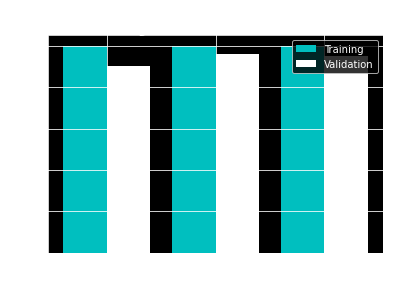

n = 2

{'Training Accuracy scores': array([0.9935, 0.998 , 0.9905]), 'Mean Training Accuracy': 99.4, 'Validation Accuracy scores': array([0.916, 0.961, 0.943]), 'Mean Validation Accuracy': 94.0}


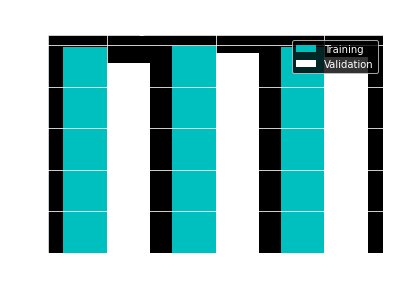

n = 3

{'Training Accuracy scores': array([0.968 , 0.9815, 0.9605]), 'Mean Training Accuracy': 97.00000000000001, 'Validation Accuracy scores': array([0.841, 0.943, 0.863]), 'Mean Validation Accuracy': 88.23333333333333}


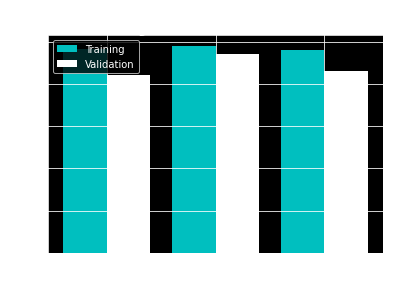

n = 4

{'Training Accuracy scores': array([0.969 , 0.9855, 0.9575]), 'Mean Training Accuracy': 97.06666666666666, 'Validation Accuracy scores': array([0.852, 0.936, 0.862]), 'Mean Validation Accuracy': 88.33333333333333}


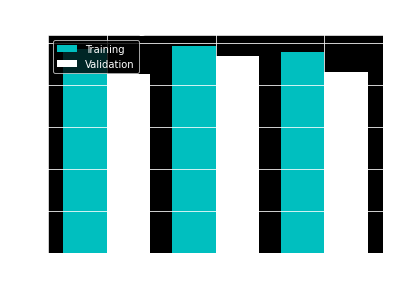

n = 5

{'Training Accuracy scores': array([0.932 , 0.9305, 0.8985]), 'Mean Training Accuracy': 92.03333333333333, 'Validation Accuracy scores': array([0.789, 0.858, 0.795]), 'Mean Validation Accuracy': 81.4}


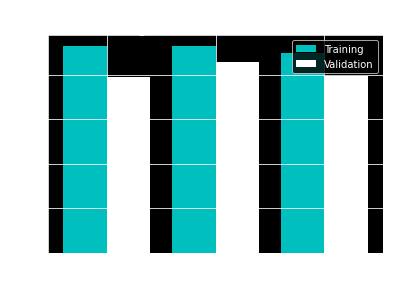

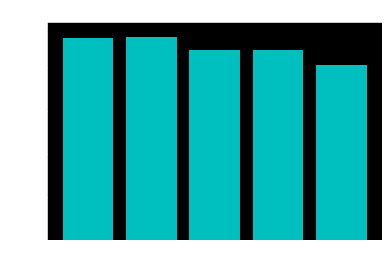

kernel = linear

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.931, 0.949, 0.97 ]), 'Mean Validation Accuracy': 94.99999999999999}


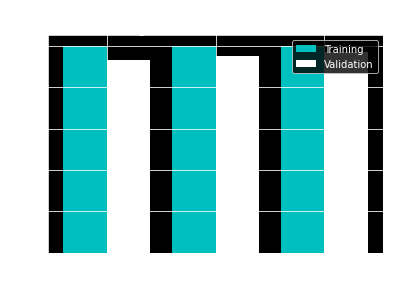

kernel = poly

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.911, 0.946, 0.969]), 'Mean Validation Accuracy': 94.2}


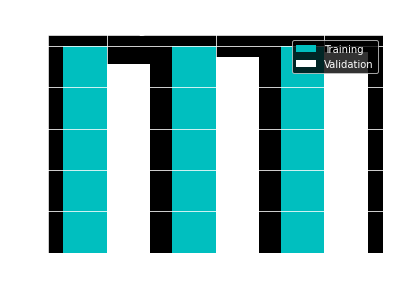

kernel = sigmoid

{'Training Accuracy scores': array([0.7195, 0.6035, 0.371 ]), 'Mean Training Accuracy': 56.46666666666667, 'Validation Accuracy scores': array([0.538, 0.793, 0.459]), 'Mean Validation Accuracy': 59.66666666666667}


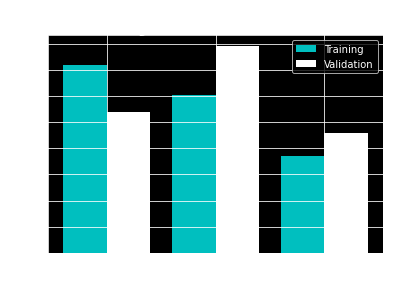

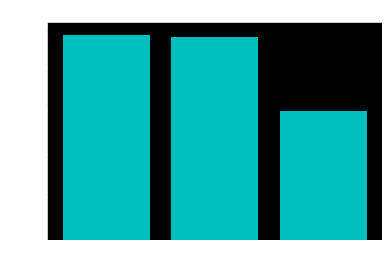

{'Training Accuracy scores': array([0.726 , 0.7015, 0.702 ]), 'Mean Training Accuracy': 70.98333333333335, 'Validation Accuracy scores': array([0.595, 0.764, 0.661]), 'Mean Validation Accuracy': 67.33333333333333}


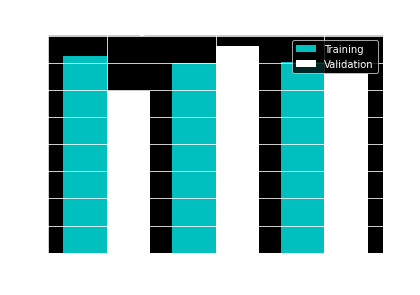

solver = lbfgs

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.929, 0.947, 0.968]), 'Mean Validation Accuracy': 94.8}


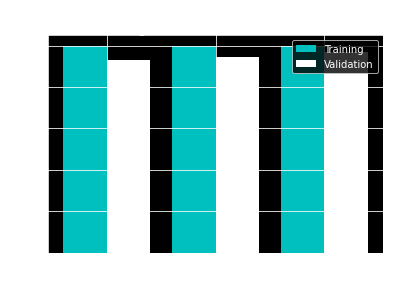

solver = liblinear

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.929, 0.948, 0.968]), 'Mean Validation Accuracy': 94.83333333333333}


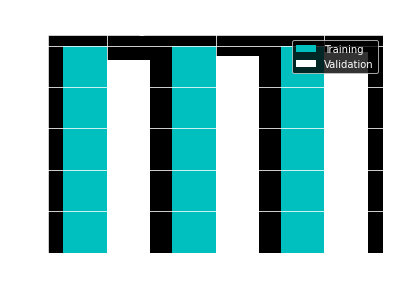

solver = newton-cg

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.931, 0.948, 0.968]), 'Mean Validation Accuracy': 94.89999999999999}


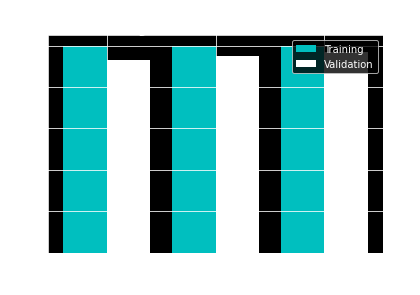

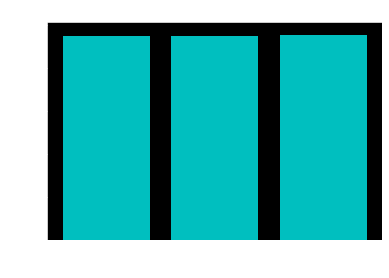

In [ ]:
# k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
# logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
# s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
# n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)
k_n_n_c(datalr, resultlr)
s_v_m_c(datalr, resultlr)
n_b_g_c(datalr, resultlr)
logistic_regression_c(datalr, resultlr)

In [ ]:
del datalr, resultlr

## HOG + SIFT

In [ ]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img_hog = give_hog(img)
        img_hog = cv2.resize(img_hog, (224, 224))
        img = cv2.resize(img, (224, 224))
        img_sift = give_sift(img)
        img_sift = cv2.resize(img_sift, (224, 224))
        # print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
#             print(img.shape, img_sift.shape, img_hog.shape)
            img = cv2.vconcat((img, img_sift))
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            img_hog = np.concatenate([img_hog, img_hog], axis=0)
            img_hog = np.array(img_hog)
#             print(img.shape, img_hog.shape)
#             break
            img = np.concatenate([img, img_hog], axis=1)
#             print(img.shape, np.concatenate([img_hog, img_hog], axis=0).shape)
            datalr.append(np.array(img))
            resultlr.append(op)
#             print(op, i, img.shape)
#             break
        


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

3000 3000

(3000, 448, 896)

(3000, 401408)

3000 3000

2250 750


n = 1

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.902, 0.957, 0.944]), 'Mean Validation Accuracy': 93.43333333333334}


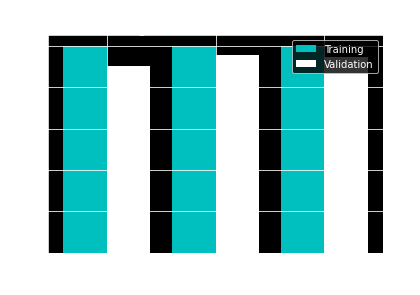

n = 2

{'Training Accuracy scores': array([0.9925, 0.996 , 0.9895]), 'Mean Training Accuracy': 99.26666666666667, 'Validation Accuracy scores': array([0.912, 0.948, 0.939]), 'Mean Validation Accuracy': 93.3}


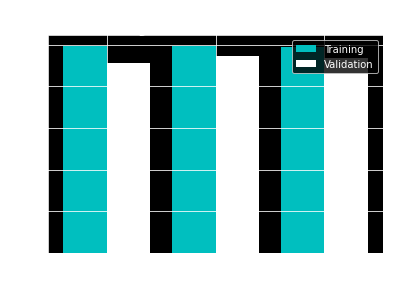

n = 3

{'Training Accuracy scores': array([0.967 , 0.985 , 0.9605]), 'Mean Training Accuracy': 97.08333333333333, 'Validation Accuracy scores': array([0.843, 0.937, 0.86 ]), 'Mean Validation Accuracy': 88.0}


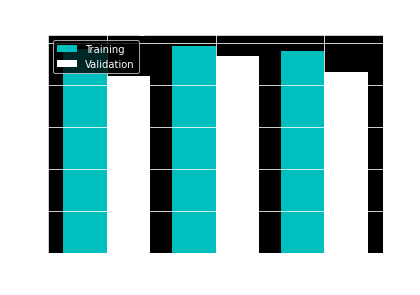

n = 4

{'Training Accuracy scores': array([0.9685, 0.985 , 0.9605]), 'Mean Training Accuracy': 97.13333333333334, 'Validation Accuracy scores': array([0.855, 0.929, 0.867]), 'Mean Validation Accuracy': 88.36666666666666}


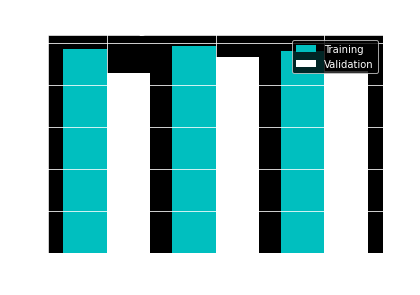

n = 5

{'Training Accuracy scores': array([0.9315, 0.938 , 0.9105]), 'Mean Training Accuracy': 92.66666666666666, 'Validation Accuracy scores': array([0.796, 0.866, 0.808]), 'Mean Validation Accuracy': 82.33333333333333}


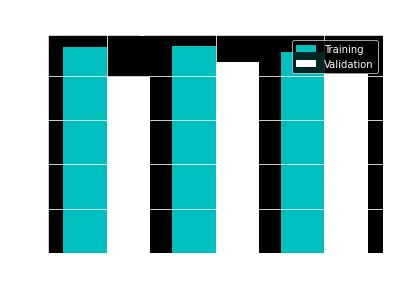

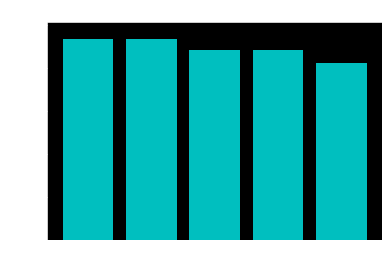

kernel = linear

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.932, 0.947, 0.968]), 'Mean Validation Accuracy': 94.89999999999999}


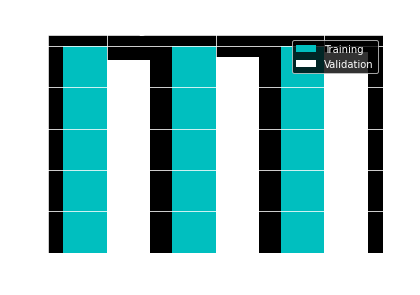

kernel = poly

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.908, 0.941, 0.956]), 'Mean Validation Accuracy': 93.5}


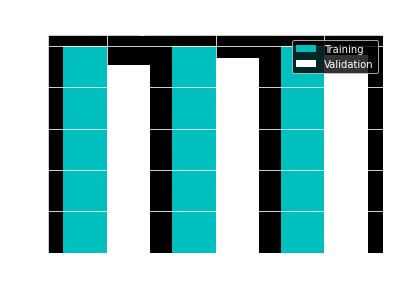

kernel = sigmoid

{'Training Accuracy scores': array([0.7245, 0.621 , 0.69  ]), 'Mean Training Accuracy': 67.85, 'Validation Accuracy scores': array([0.54 , 0.793, 0.619]), 'Mean Validation Accuracy': 65.06666666666668}


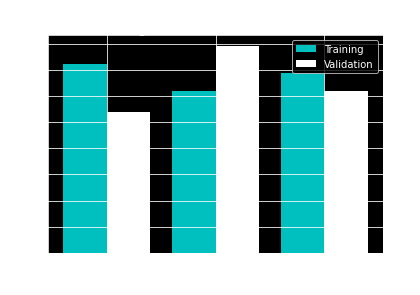

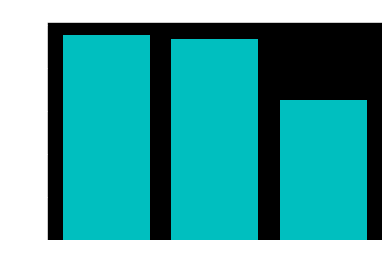

{'Training Accuracy scores': array([0.816 , 0.8475, 0.809 ]), 'Mean Training Accuracy': 82.41666666666667, 'Validation Accuracy scores': array([0.726, 0.818, 0.767]), 'Mean Validation Accuracy': 77.03333333333333}


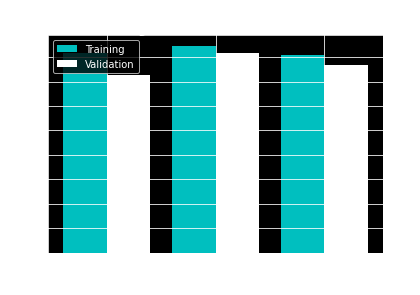

solver = lbfgs

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.933, 0.947, 0.967]), 'Mean Validation Accuracy': 94.89999999999999}


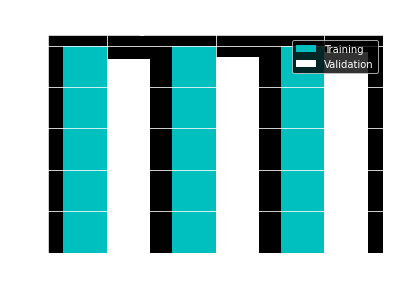

solver = liblinear

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.931, 0.946, 0.967]), 'Mean Validation Accuracy': 94.8}


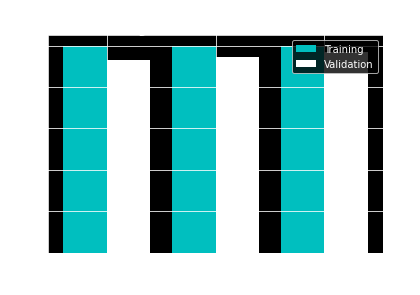

solver = newton-cg

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.933, 0.946, 0.968]), 'Mean Validation Accuracy': 94.89999999999999}


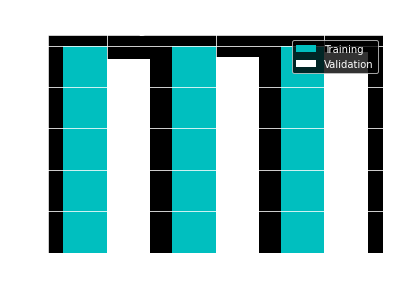

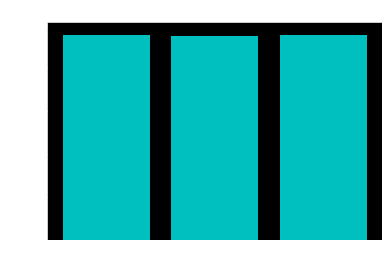

In [ ]:
# k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
# logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
# s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
# n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)
k_n_n_c(datalr, resultlr)
s_v_m_c(datalr, resultlr)
n_b_g_c(datalr, resultlr)
logistic_regression_c(datalr, resultlr)

In [ ]:
del datalr, resultlr

## HOG + ORB

In [ ]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img_hog = give_hog(img)
        img_hog = cv2.resize(img_hog, (224, 224))
        img = cv2.resize(img, (224, 224))
        img_orb = give_orb(img)
        img_orb = cv2.resize(img_orb, (224, 224))
        # print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
#             print(img.shape, img_sift.shape, img_hog.shape)
            img = cv2.vconcat((img, img_orb))
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            img_hog = np.concatenate([img_hog, img_hog], axis=0)
            img_hog = np.array(img_hog)
#             print(img.shape, img_hog.shape)
#             break
            img = np.concatenate([img, img_hog], axis=1)
#             print(img.shape, np.concatenate([img_hog, img_hog], axis=0).shape)
            datalr.append(np.array(img))
            resultlr.append(op)
#             print(op, i, img.shape)
#             break
        


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

3000 3000

(3000, 448, 896)

(3000, 401408)

3000 3000

2250 750


n = 1

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.903, 0.962, 0.95 ]), 'Mean Validation Accuracy': 93.83333333333333}


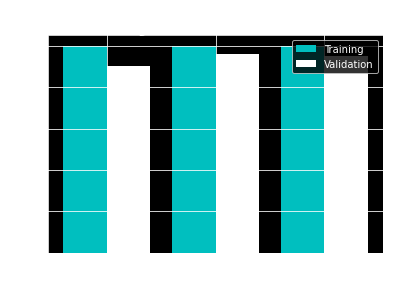

n = 2

{'Training Accuracy scores': array([0.994 , 0.998 , 0.9905]), 'Mean Training Accuracy': 99.41666666666666, 'Validation Accuracy scores': array([0.913, 0.962, 0.946]), 'Mean Validation Accuracy': 94.03333333333333}


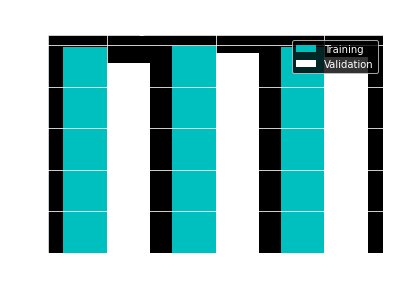

n = 3

{'Training Accuracy scores': array([0.968 , 0.9815, 0.961 ]), 'Mean Training Accuracy': 97.01666666666667, 'Validation Accuracy scores': array([0.846, 0.942, 0.863]), 'Mean Validation Accuracy': 88.36666666666666}


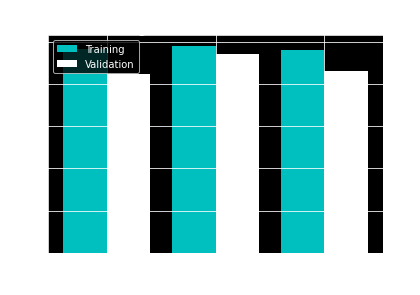

n = 4

{'Training Accuracy scores': array([0.9685, 0.984 , 0.959 ]), 'Mean Training Accuracy': 97.05, 'Validation Accuracy scores': array([0.855, 0.937, 0.862]), 'Mean Validation Accuracy': 88.46666666666665}


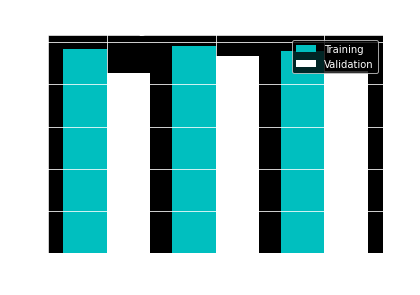

n = 5

{'Training Accuracy scores': array([0.933 , 0.9335, 0.9   ]), 'Mean Training Accuracy': 92.21666666666667, 'Validation Accuracy scores': array([0.797, 0.857, 0.797]), 'Mean Validation Accuracy': 81.7}


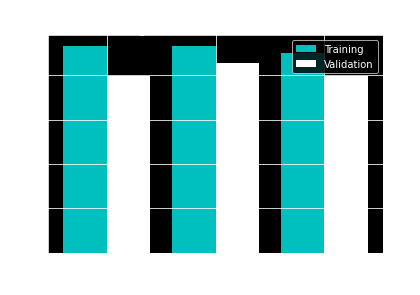

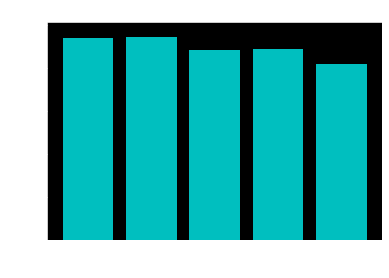

kernel = linear

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.936, 0.948, 0.97 ]), 'Mean Validation Accuracy': 95.13333333333334}


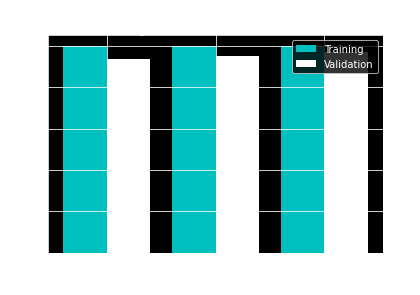

kernel = poly

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.914, 0.944, 0.969]), 'Mean Validation Accuracy': 94.23333333333333}


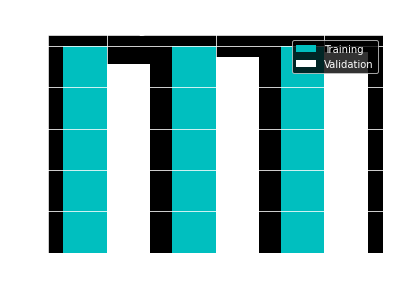

kernel = sigmoid

{'Training Accuracy scores': array([0.7245, 0.6145, 0.6905]), 'Mean Training Accuracy': 67.65, 'Validation Accuracy scores': array([0.545, 0.793, 0.615]), 'Mean Validation Accuracy': 65.10000000000001}


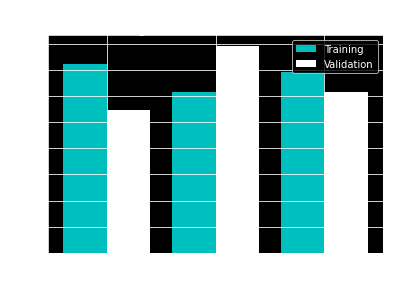

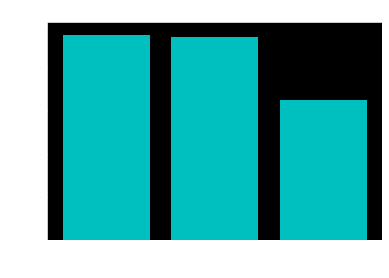

{'Training Accuracy scores': array([0.8135, 0.8465, 0.807 ]), 'Mean Training Accuracy': 82.23333333333333, 'Validation Accuracy scores': array([0.727, 0.818, 0.765]), 'Mean Validation Accuracy': 77.0}


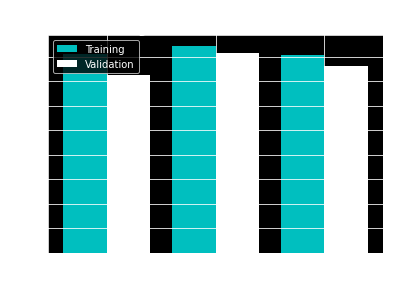

solver = lbfgs

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.931, 0.948, 0.969]), 'Mean Validation Accuracy': 94.93333333333332}


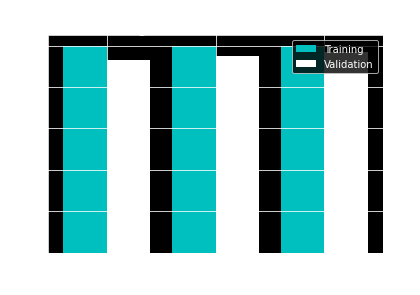

solver = liblinear

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.931, 0.948, 0.968]), 'Mean Validation Accuracy': 94.89999999999999}


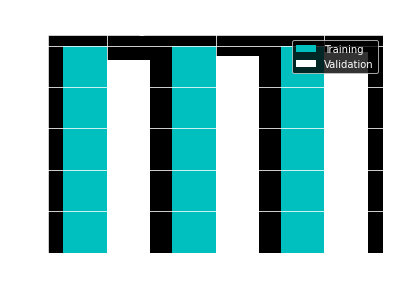

solver = newton-cg

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.932, 0.948, 0.969]), 'Mean Validation Accuracy': 94.96666666666665}


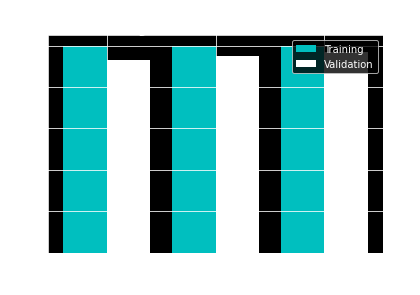

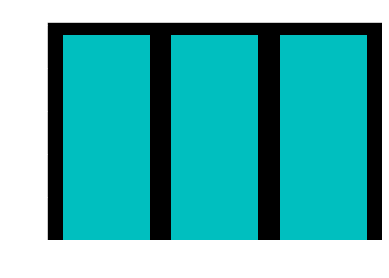

In [ ]:
# k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
# logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
# s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
# n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)
k_n_n_c(datalr, resultlr)
s_v_m_c(datalr, resultlr)
n_b_g_c(datalr, resultlr)
logistic_regression_c(datalr, resultlr)

In [ ]:
del datalr, resultlr

## SIFT + ORB

In [ ]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224))
#         print(img_hog.shape)
        img_orb = give_orb(img)
        img_orb = cv2.resize(img_orb, (224, 224))
        img_sift = give_sift(img)
        img_sift = cv2.resize(img_sift, (224, 224))
        # print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            # print(img.shape, img_sift.shape, img_orb.shape)
            img = cv2.vconcat((img, img_sift, img_orb))
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            datalr.append(np.array(img))
            resultlr.append(op)
#             break


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

In [ ]:
# k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
# logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
# s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
# n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)
k_n_n_c(datalr, resultlr)
s_v_m_c(datalr, resultlr)
n_b_g_c(datalr, resultlr)
logistic_regression_c(datalr, resultlr)

In [ ]:
del datalr, resultlr

## HOG + SIFT + ORB

In [ ]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img_hog = give_hog(img)
        img_hog = cv2.resize(img_hog, (224, 224))
        img = cv2.resize(img, (224, 224))
#         print(img_hog.shape)
        img_orb = give_orb(img)
        img_orb = cv2.resize(img_orb, (224, 224))
        img_sift = give_sift(img)
        img_sift = cv2.resize(img_sift, (224, 224))
        # print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            # print(img.shape, img_sift.shape, img_orb.shape)
            img = cv2.vconcat((img, img_sift, img_orb))
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            img_hog = np.concatenate([img_hog, img_hog, img_hog], axis=0)
            img_hog = np.array(img_hog)
#             print(img.shape, img_hog.shape)
#             break
            img = np.concatenate([img, img_hog], axis=1)
#             print(img.shape, np.concatenate([img_hog, img_hog], axis=0).shape)
            datalr.append(np.array(img))
            resultlr.append(op)
#             break


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

In [ ]:
# k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
# logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
# s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
# n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)
k_n_n_c(datalr, resultlr)
s_v_m_c(datalr, resultlr)
n_b_g_c(datalr, resultlr)
logistic_regression_c(datalr, resultlr)

In [ ]:
del datalr, resultlr

## Thresholding

In [ ]:
datalr = []
resultlr = []
def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
#         img = connected_component_analysis(img)
        _,img = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
#         img = give_pca(img, 100)
        img = cv2.resize(img, (224, 224))
        # print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            datalr.append(np.array(img))
            resultlr.append(op)
            # cv2_imshow(img)
            # break
data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)

In [ ]:
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
print(datalr[0].shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

3000 3000
(3000, 224, 672)
(224, 672)
(3000, 150528)
3000 3000
2250 750


n = 1
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.94 , 0.932, 0.924]), 'Mean Validation Accuracy': 93.19999999999999}


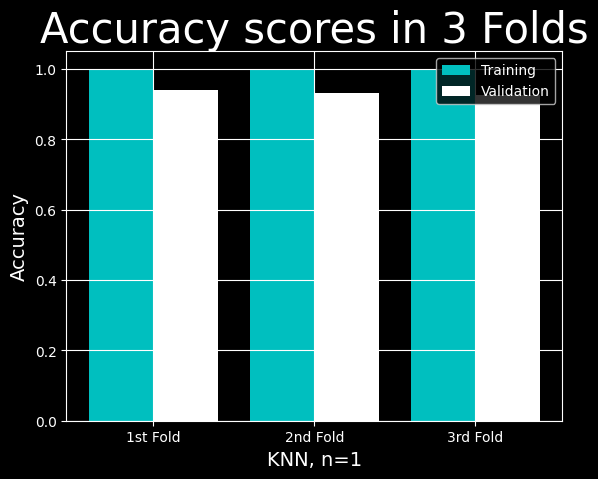

n = 2
{'Training Accuracy scores': array([0.9935, 0.993 , 0.991 ]), 'Mean Training Accuracy': 99.25, 'Validation Accuracy scores': array([0.936, 0.928, 0.913]), 'Mean Validation Accuracy': 92.56666666666668}


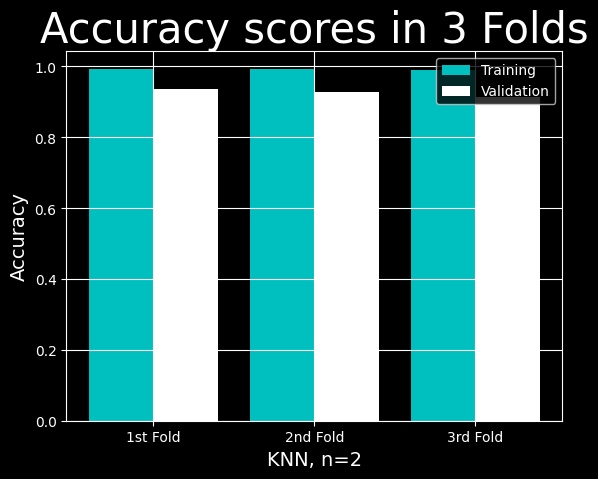

n = 3
{'Training Accuracy scores': array([0.929 , 0.9315, 0.9335]), 'Mean Training Accuracy': 93.13333333333334, 'Validation Accuracy scores': array([0.857, 0.851, 0.844]), 'Mean Validation Accuracy': 85.06666666666666}


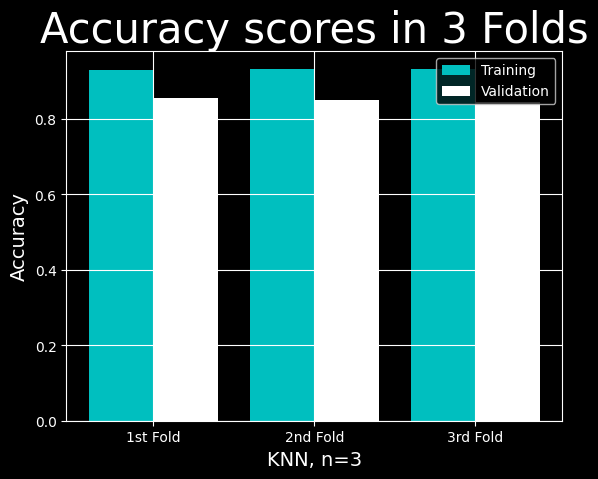

n = 4
{'Training Accuracy scores': array([0.928, 0.929, 0.931]), 'Mean Training Accuracy': 92.93333333333335, 'Validation Accuracy scores': array([0.858, 0.849, 0.847]), 'Mean Validation Accuracy': 85.13333333333333}


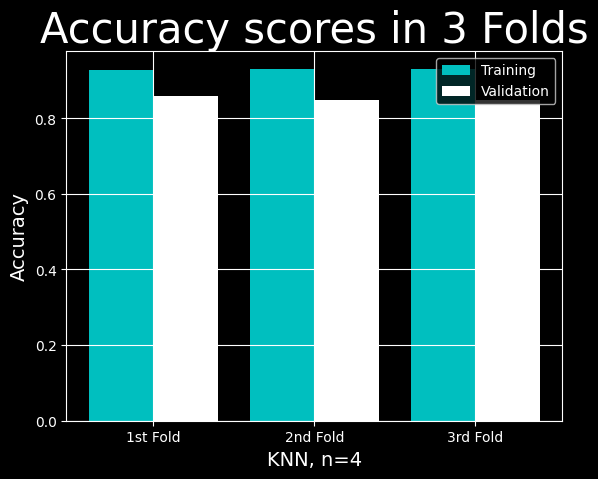

n = 5
{'Training Accuracy scores': array([0.862 , 0.863 , 0.8655]), 'Mean Training Accuracy': 86.35000000000001, 'Validation Accuracy scores': array([0.81 , 0.815, 0.805]), 'Mean Validation Accuracy': 81.0}


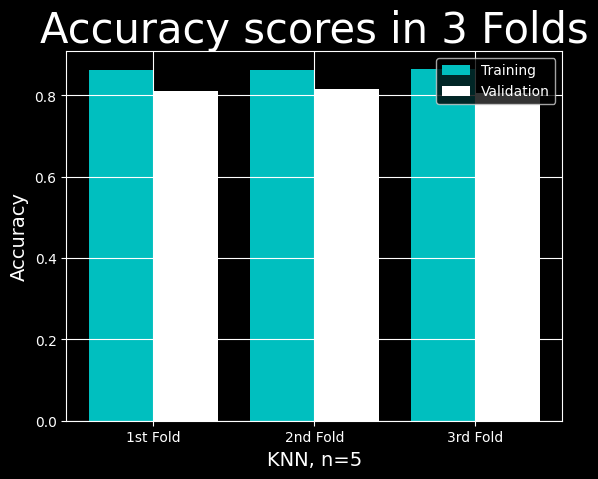

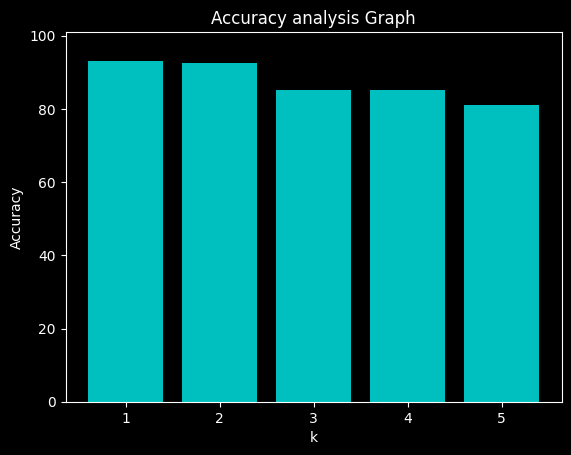

kernel = linear
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.917, 0.929, 0.915]), 'Mean Validation Accuracy': 92.03333333333333}


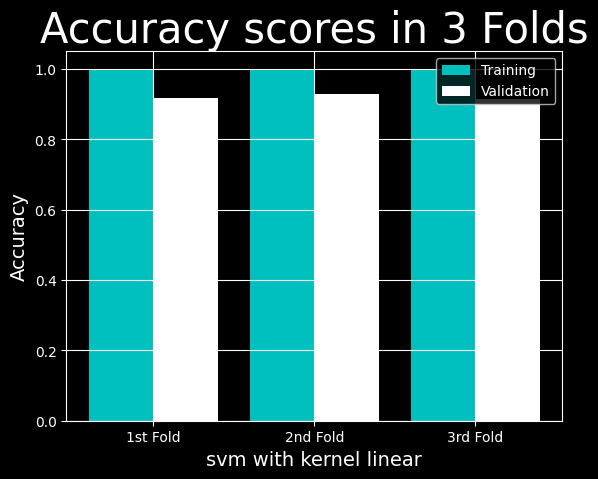

kernel = poly
{'Training Accuracy scores': array([0.9915, 0.993 , 0.9945]), 'Mean Training Accuracy': 99.3, 'Validation Accuracy scores': array([0.896, 0.909, 0.886]), 'Mean Validation Accuracy': 89.70000000000002}


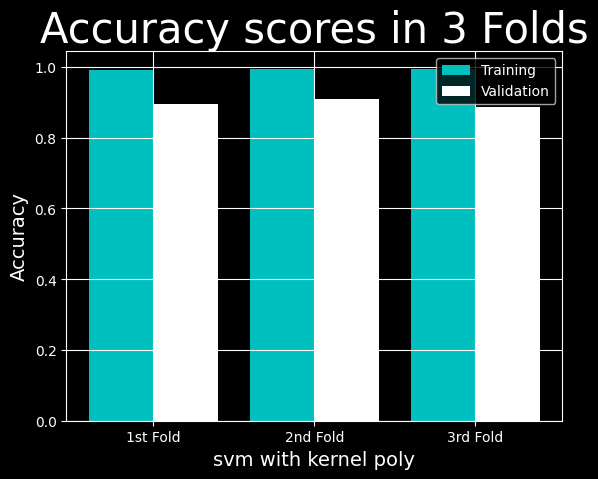

kernel = sigmoid
{'Training Accuracy scores': array([0.6545, 0.6275, 0.6485]), 'Mean Training Accuracy': 64.35, 'Validation Accuracy scores': array([0.626, 0.624, 0.611]), 'Mean Validation Accuracy': 62.03333333333333}


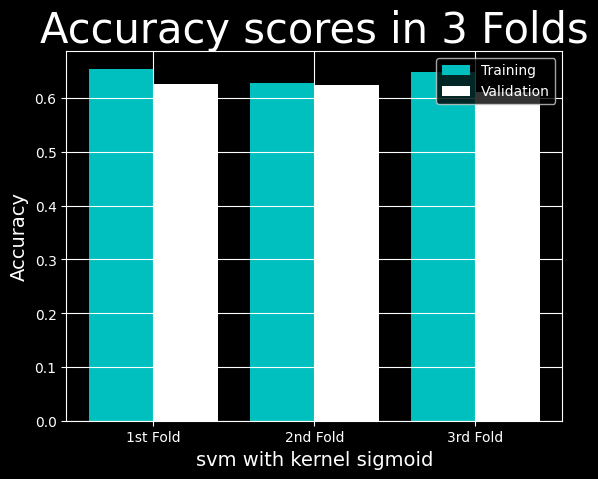

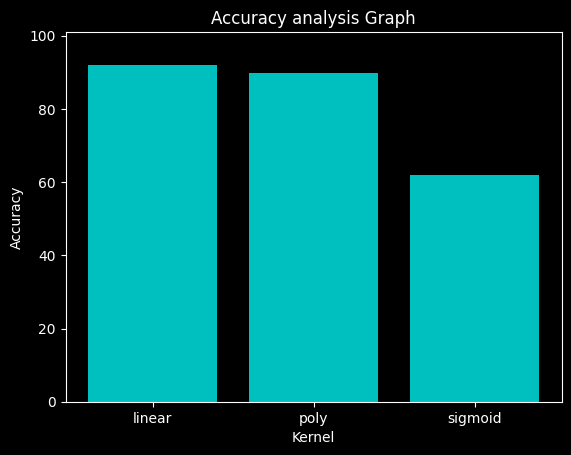

{'Training Accuracy scores': array([0.7135, 0.685 , 0.7145]), 'Mean Training Accuracy': 70.43333333333334, 'Validation Accuracy scores': array([0.674, 0.735, 0.668]), 'Mean Validation Accuracy': 69.23333333333333}


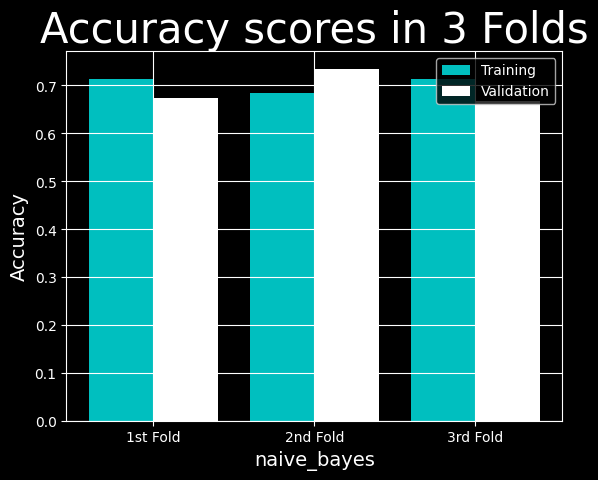

solver = lbfgs
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.925, 0.933, 0.925]), 'Mean Validation Accuracy': 92.76666666666668}


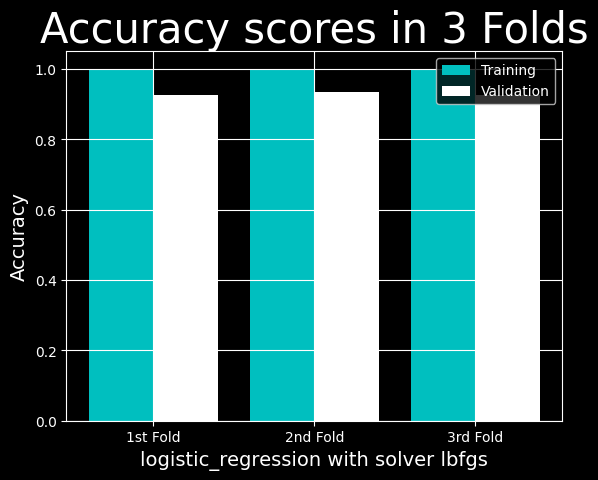

solver = liblinear
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.933, 0.934, 0.94 ]), 'Mean Validation Accuracy': 93.56666666666666}


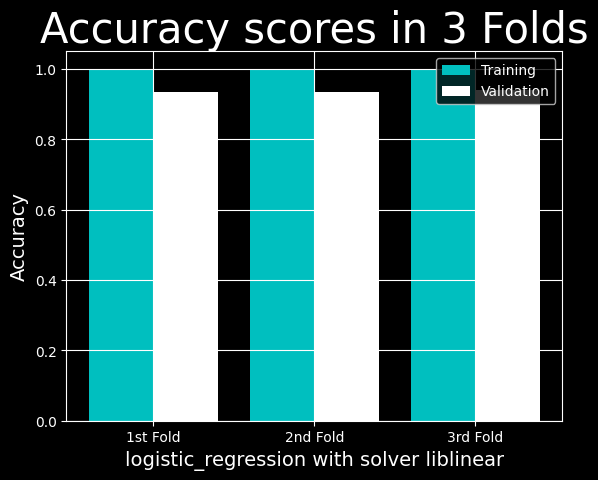

solver = newton-cg
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.924, 0.933, 0.928]), 'Mean Validation Accuracy': 92.83333333333333}


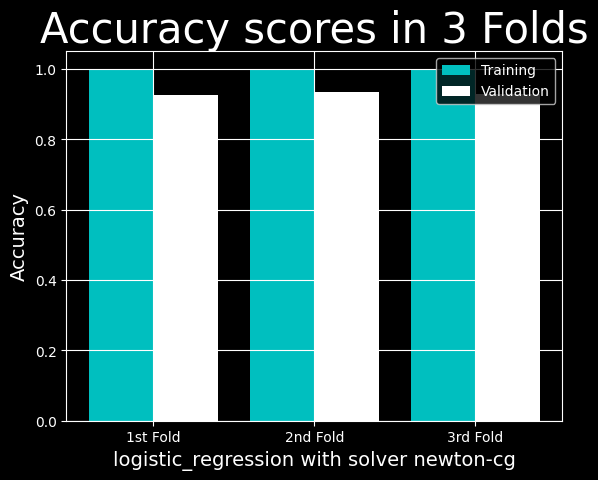

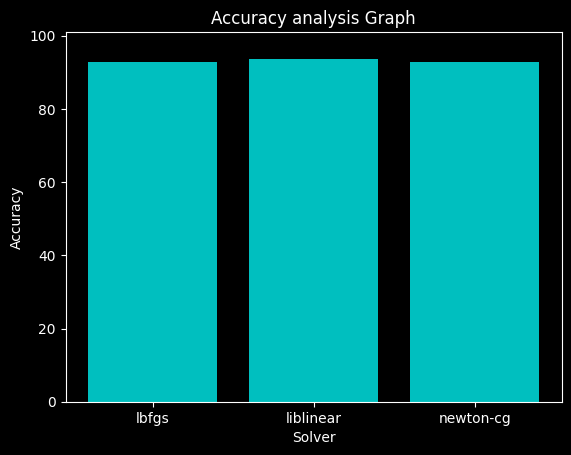

In [ ]:
k_n_n_c(datalr, resultlr)
s_v_m_c(datalr, resultlr)
n_b_g_c(datalr, resultlr)
logistic_regression_c(datalr, resultlr)
# s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
# n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)
# logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)

In [ ]:
del datalr, resultlr

## Connected Component Analysis

In [ ]:
datalr = []
resultlr = []
def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img = connected_component_analysis(img)
#         _,img = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
#         img = give_pca(img, 100)
        img = cv2.resize(img, (224, 224))
        # print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224)):
            # nsamples, nx, ny = img.shape
            # img = img.reshape((nsamples,nx*ny))
            datalr.append(np.array(img))
            resultlr.append(op)
            # cv2_imshow(img)
            # break
data_input_lr(paths_yes, 0)
# print(len(datalr), datalr)
data_input_lr(paths_no, 1)

In [ ]:
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

3000 3000
(3000, 224, 224)
(3000, 50176)
3000 3000
2250 750


n = 1
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.946, 0.929, 0.926]), 'Mean Validation Accuracy': 93.36666666666667}


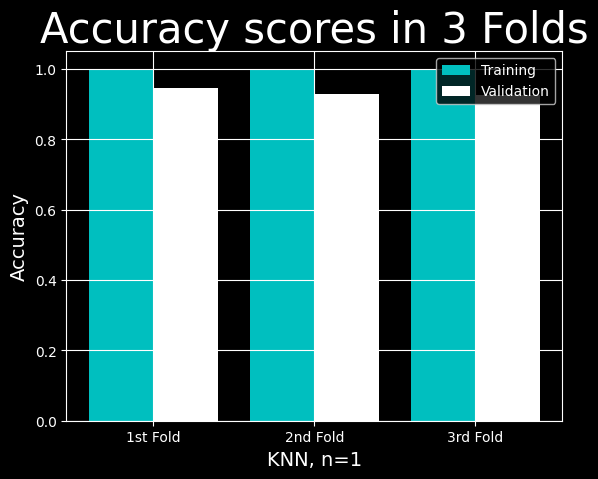

n = 2
{'Training Accuracy scores': array([0.99  , 0.9915, 0.9885]), 'Mean Training Accuracy': 99.00000000000001, 'Validation Accuracy scores': array([0.934, 0.925, 0.908]), 'Mean Validation Accuracy': 92.23333333333333}


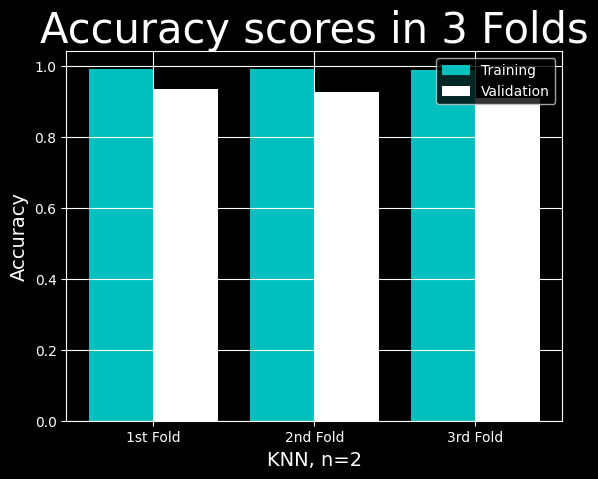

n = 3
{'Training Accuracy scores': array([0.9245, 0.9285, 0.928 ]), 'Mean Training Accuracy': 92.7, 'Validation Accuracy scores': array([0.857, 0.848, 0.841]), 'Mean Validation Accuracy': 84.86666666666667}


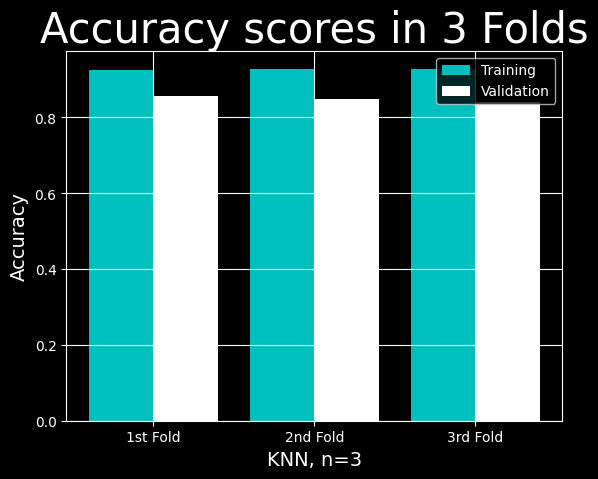

n = 4
{'Training Accuracy scores': array([0.9215, 0.924 , 0.9215]), 'Mean Training Accuracy': 92.23333333333333, 'Validation Accuracy scores': array([0.851, 0.851, 0.839]), 'Mean Validation Accuracy': 84.7}


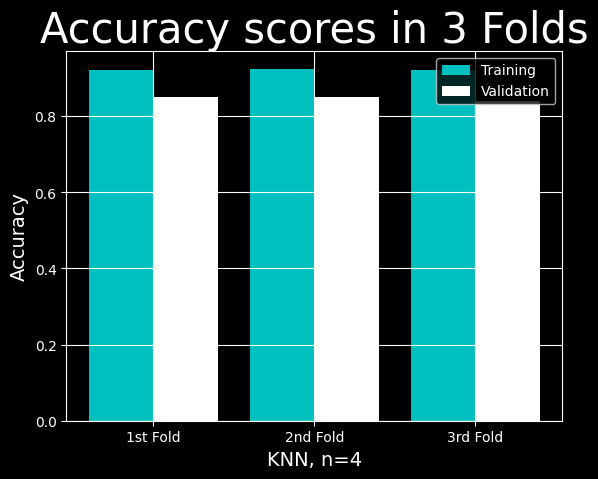

n = 5
{'Training Accuracy scores': array([0.852 , 0.8575, 0.861 ]), 'Mean Training Accuracy': 85.68333333333334, 'Validation Accuracy scores': array([0.805, 0.814, 0.82 ]), 'Mean Validation Accuracy': 81.30000000000001}


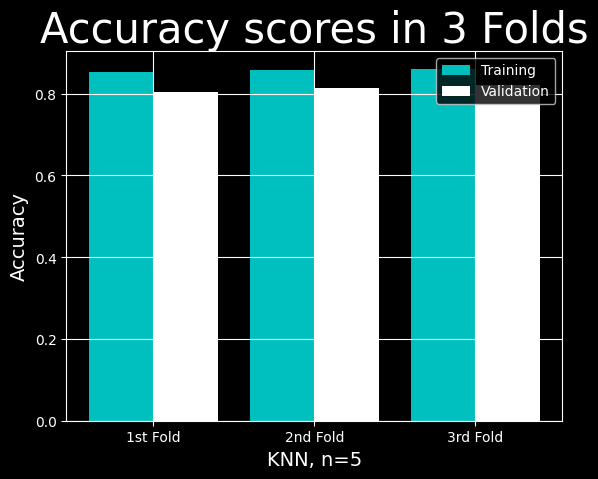

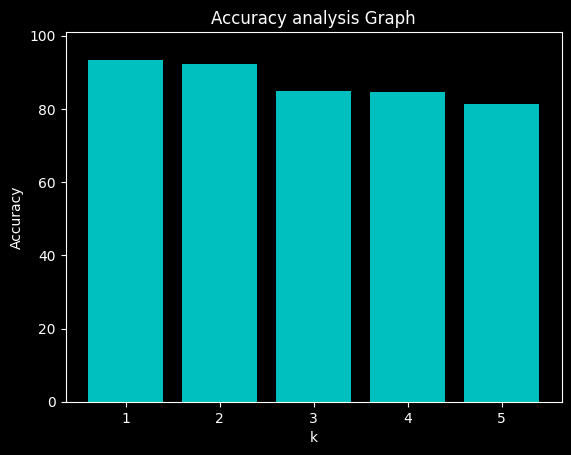

kernel = linear
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.91 , 0.909, 0.916]), 'Mean Validation Accuracy': 91.16666666666666}


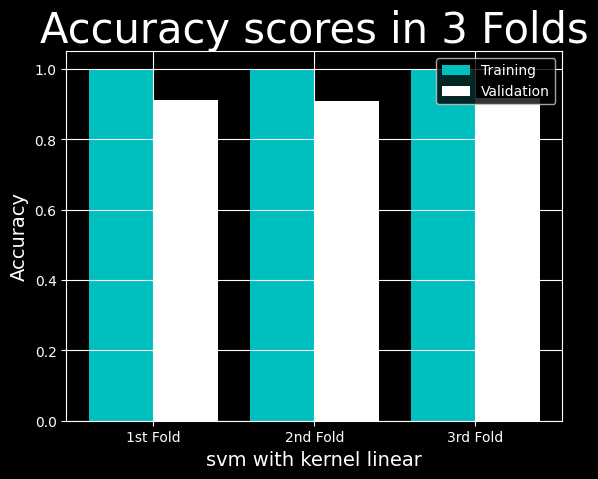

kernel = poly
{'Training Accuracy scores': array([0.992 , 0.9955, 0.995 ]), 'Mean Training Accuracy': 99.41666666666666, 'Validation Accuracy scores': array([0.912, 0.916, 0.898]), 'Mean Validation Accuracy': 90.86666666666666}


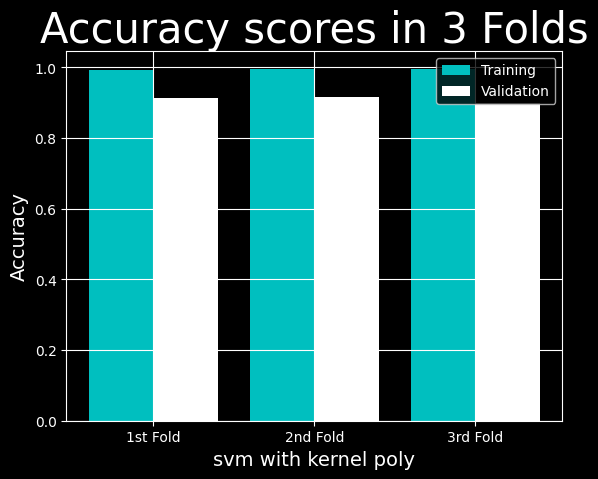

kernel = sigmoid
{'Training Accuracy scores': array([0.5735, 0.5465, 0.5715]), 'Mean Training Accuracy': 56.38333333333333, 'Validation Accuracy scores': array([0.561, 0.557, 0.531]), 'Mean Validation Accuracy': 54.96666666666666}


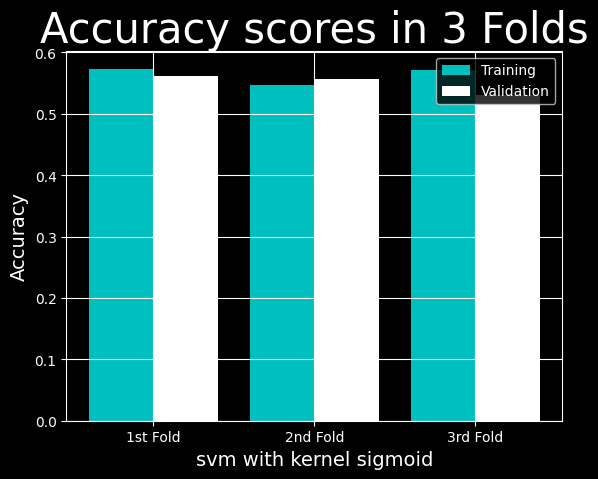

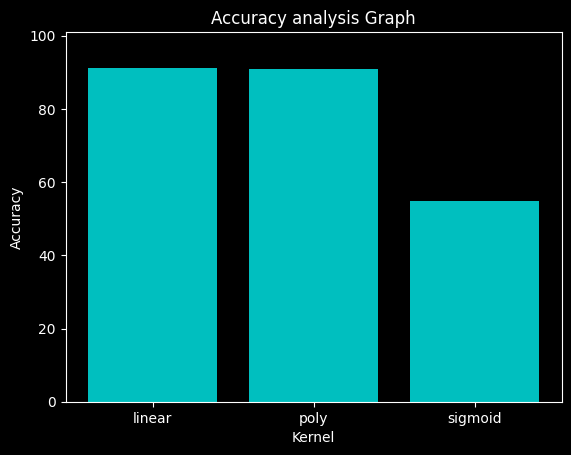

{'Training Accuracy scores': array([0.609 , 0.605 , 0.6115]), 'Mean Training Accuracy': 60.849999999999994, 'Validation Accuracy scores': array([0.577, 0.616, 0.578]), 'Mean Validation Accuracy': 59.033333333333324}


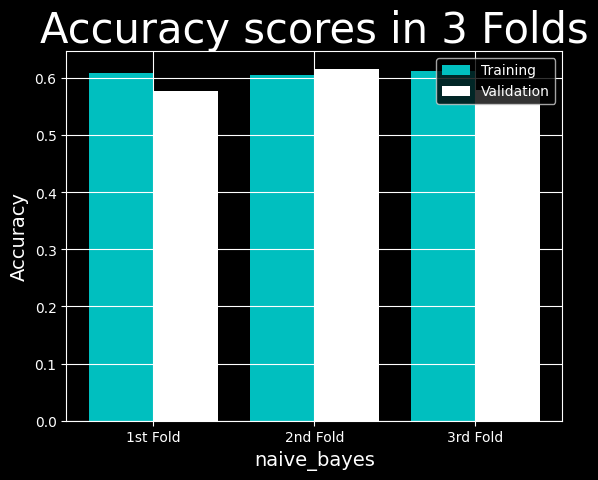

solver = lbfgs
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.917, 0.915, 0.922]), 'Mean Validation Accuracy': 91.8}


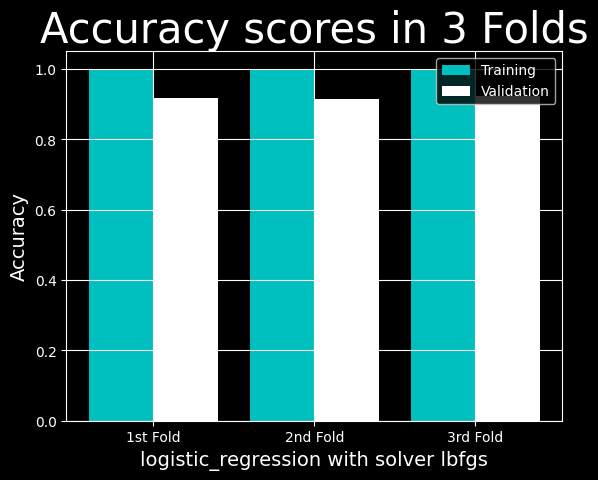

solver = liblinear
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.919, 0.916, 0.931]), 'Mean Validation Accuracy': 92.2}


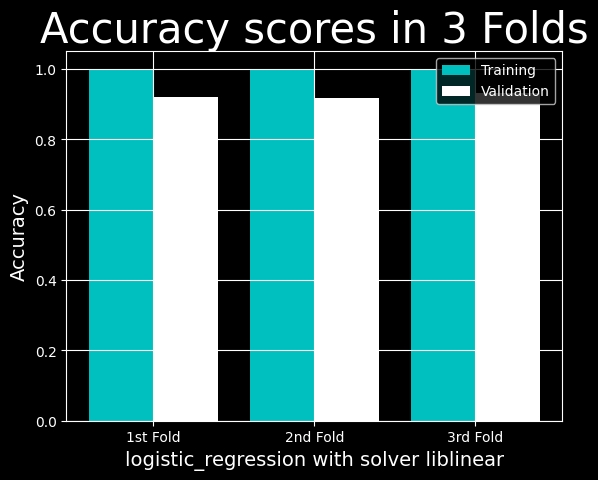

solver = newton-cg
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.919, 0.917, 0.924]), 'Mean Validation Accuracy': 92.0}


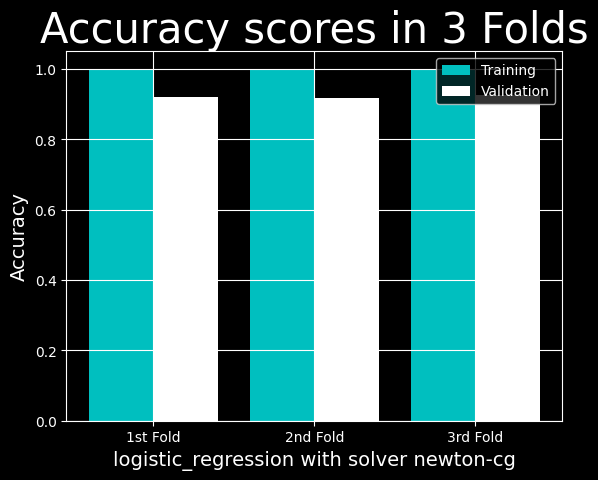

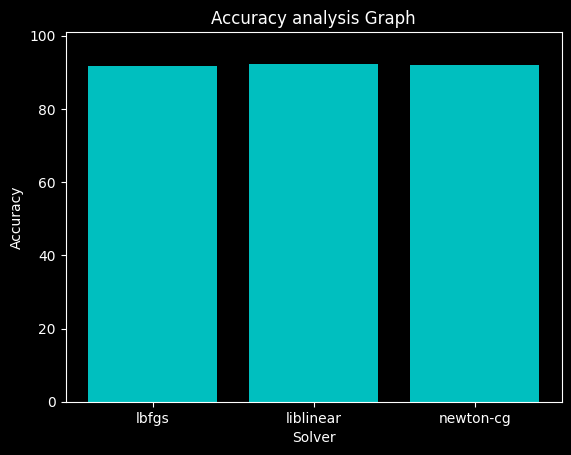

In [ ]:
# k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
# logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
# s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
# n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)
k_n_n_c(datalr, resultlr)
s_v_m_c(datalr, resultlr)
n_b_g_c(datalr, resultlr)
logistic_regression_c(datalr, resultlr)

In [ ]:
del datalr, resultlr

## PCA

In [ ]:
datalr = []
resultlr = []
def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
#         img = connected_component_analysis(img)
#         _,img = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
        img = give_pca(img, 100)
        img = cv2.resize(img, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            datalr.append(np.array(img))
            resultlr.append(op)
            # cv2_imshow(img)
            # break
data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)

In [ ]:
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

3000 3000
(3000, 224, 672)
(3000, 150528)
3000 3000
2250 750


n = 1
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.922, 0.926, 0.908]), 'Mean Validation Accuracy': 91.86666666666667}


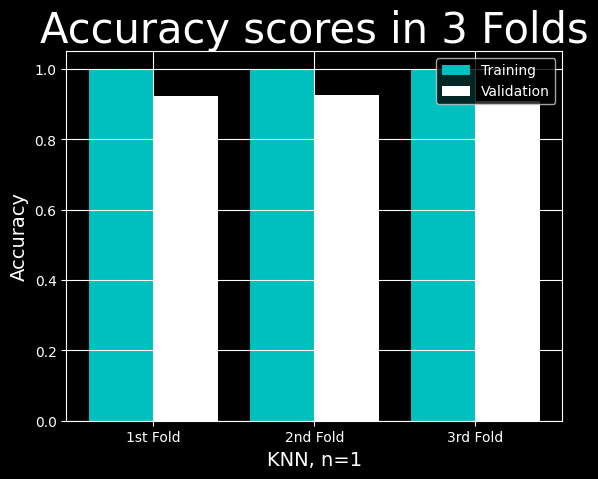

n = 2
{'Training Accuracy scores': array([0.985 , 0.987 , 0.9845]), 'Mean Training Accuracy': 98.55000000000001, 'Validation Accuracy scores': array([0.912, 0.924, 0.894]), 'Mean Validation Accuracy': 91.0}


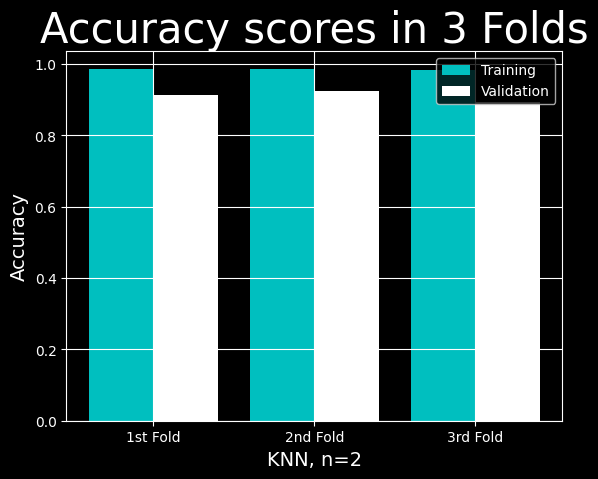

n = 3
{'Training Accuracy scores': array([0.928 , 0.9195, 0.915 ]), 'Mean Training Accuracy': 92.08333333333334, 'Validation Accuracy scores': array([0.832, 0.847, 0.814]), 'Mean Validation Accuracy': 83.1}


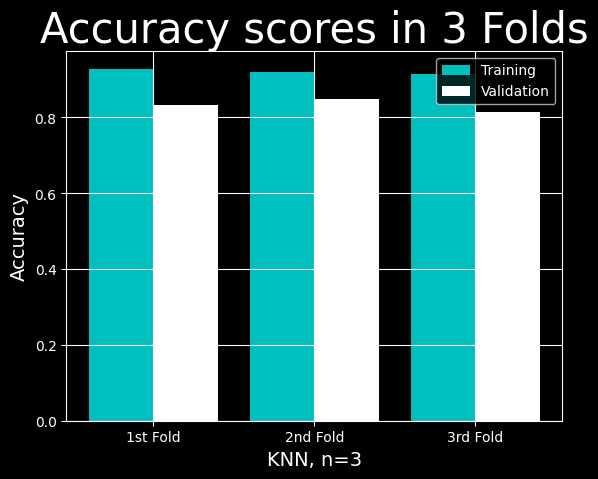

n = 4
{'Training Accuracy scores': array([0.9285, 0.9175, 0.912 ]), 'Mean Training Accuracy': 91.93333333333334, 'Validation Accuracy scores': array([0.835, 0.853, 0.817]), 'Mean Validation Accuracy': 83.5}


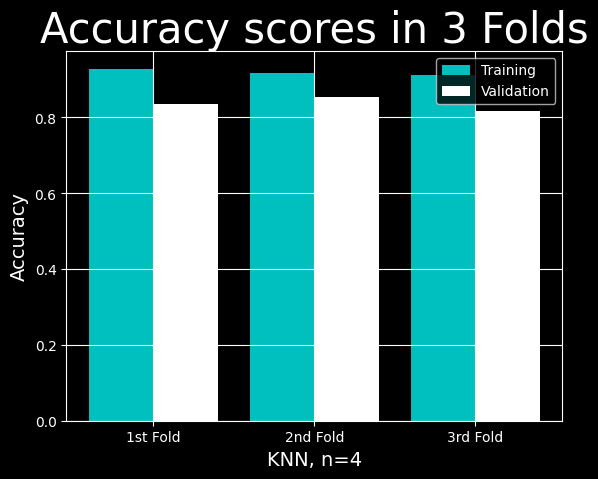

n = 5
{'Training Accuracy scores': array([0.855 , 0.8405, 0.857 ]), 'Mean Training Accuracy': 85.08333333333334, 'Validation Accuracy scores': array([0.784, 0.802, 0.768]), 'Mean Validation Accuracy': 78.46666666666667}


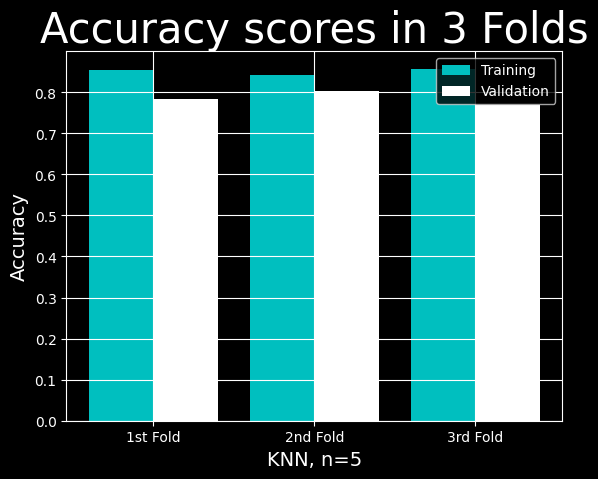

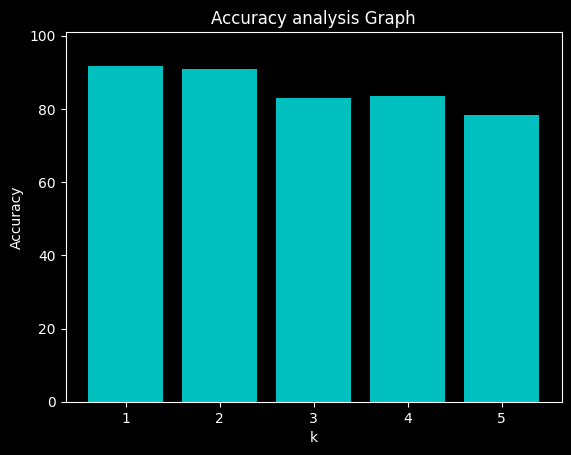

kernel = linear
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.953, 0.954, 0.931]), 'Mean Validation Accuracy': 94.60000000000001}


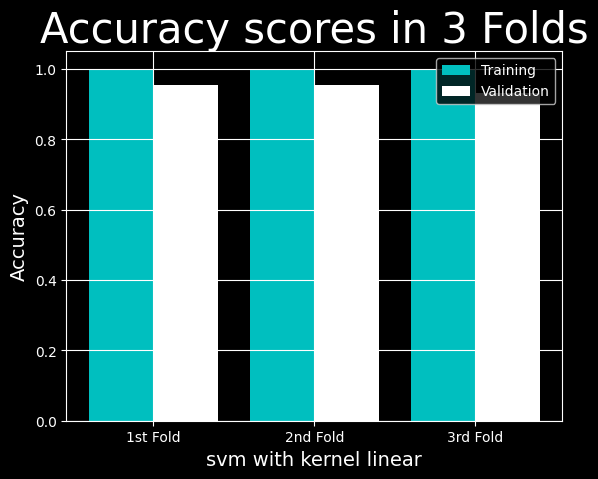

kernel = poly
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.945, 0.936, 0.916]), 'Mean Validation Accuracy': 93.23333333333333}


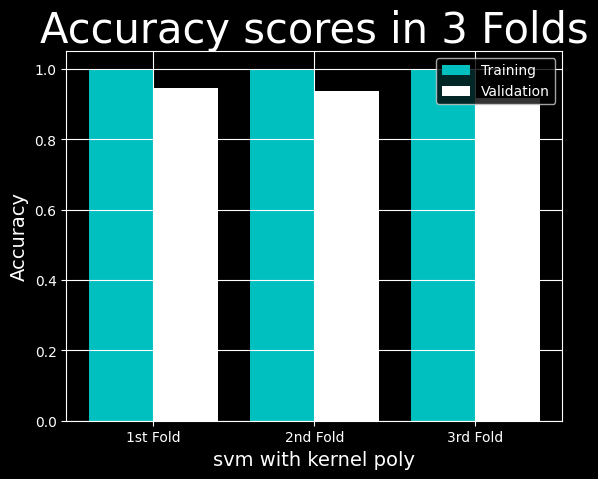

kernel = sigmoid
{'Training Accuracy scores': array([0.3805, 0.3925, 0.677 ]), 'Mean Training Accuracy': 48.33333333333334, 'Validation Accuracy scores': array([0.387, 0.368, 0.65 ]), 'Mean Validation Accuracy': 46.833333333333336}


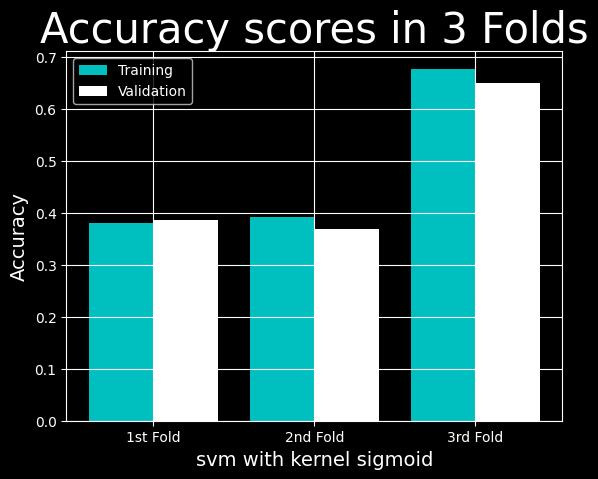

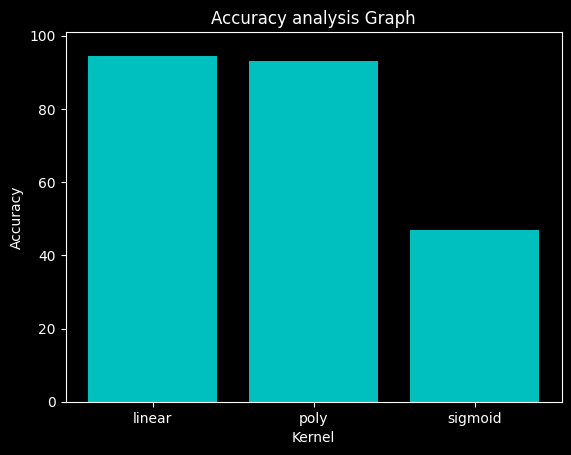

{'Training Accuracy scores': array([0.736 , 0.7155, 0.752 ]), 'Mean Training Accuracy': 73.45, 'Validation Accuracy scores': array([0.725, 0.763, 0.702]), 'Mean Validation Accuracy': 73.0}


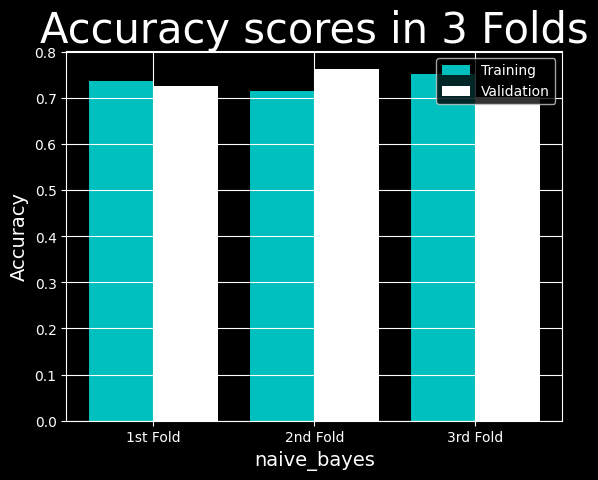

solver = lbfgs
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.953, 0.958, 0.932]), 'Mean Validation Accuracy': 94.76666666666667}


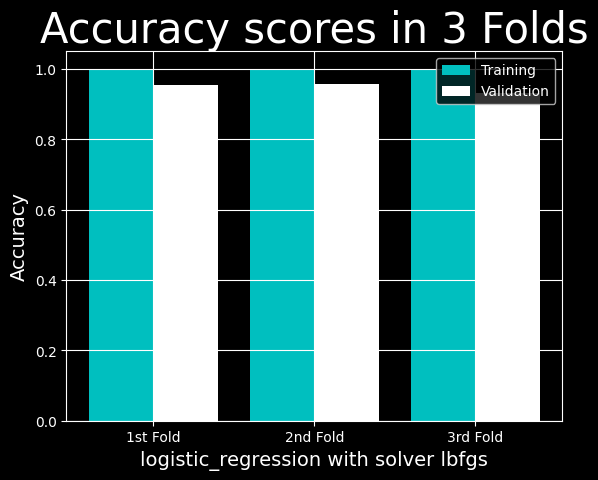

solver = liblinear
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.956, 0.962, 0.931]), 'Mean Validation Accuracy': 94.96666666666668}


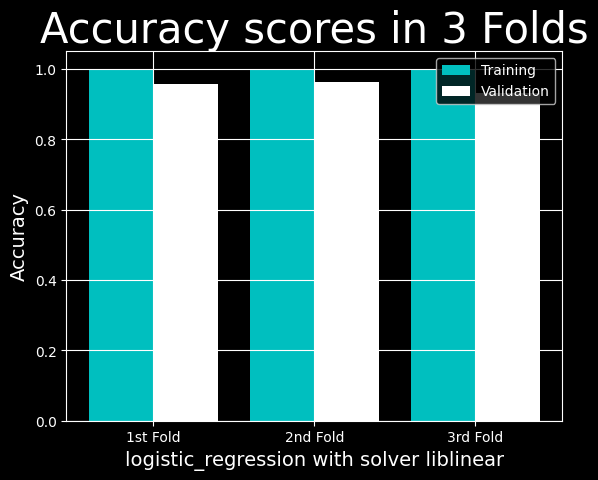

solver = newton-cg
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.953, 0.958, 0.932]), 'Mean Validation Accuracy': 94.76666666666667}


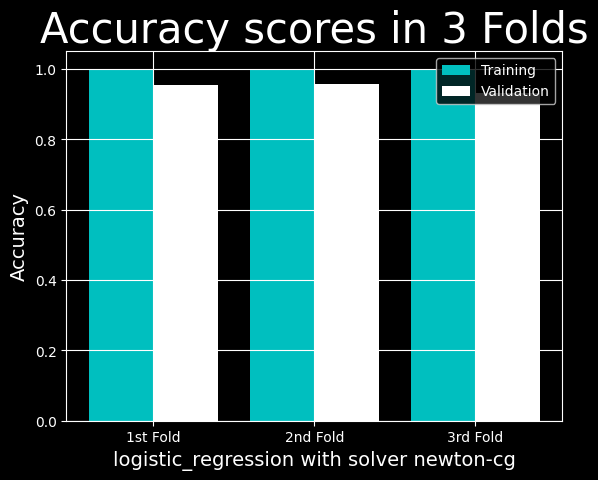

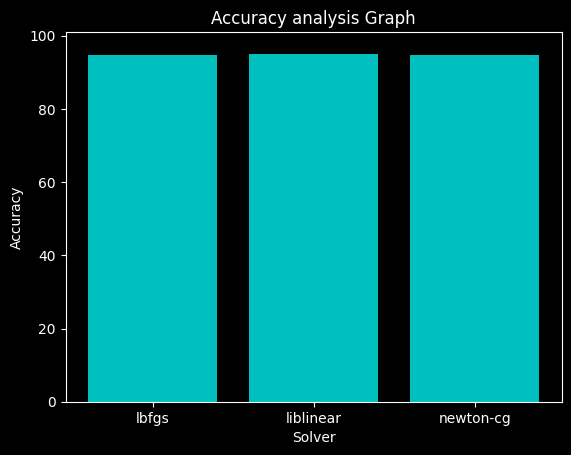

In [ ]:
# k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
# logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
# s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
# n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)
k_n_n_c(datalr, resultlr)
s_v_m_c(datalr, resultlr)
n_b_g_c(datalr, resultlr)
logistic_regression_c(datalr, resultlr)

In [ ]:
del datalr, resultlr

## Connected Componenet Analysis + PCA

In [ ]:
# datalr = []
# resultlr = []
# def data_input_lr(pathslr, op):
#     i = 0
#     for path in pathslr:
#         img = cv2.imread(path)
#         img = connected_component_analysis(img)
# #         _,img = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
#         img = give_pca(img, 100)
#         img = cv2.resize(img, (224, 224))
#         print(op, i, img.shape)
#         i += 1
#         if(img.shape == (224,224,3)):
#             nsamples, nx, ny = img.shape
#             img = img.reshape((nsamples,nx*ny))
#             datalr.append(np.array(img))
#             resultlr.append(op)
#             # cv2_imshow(img)
#             # break
# data_input_lr(paths_yes, 0)
# data_input_lr(paths_no, 1)

datalr = []
resultlr = []
def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img = give_pca(img, 10)
#         cv2_imshow(img)
        img = connected_component_analysis(img)
#         _,img = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
        img = cv2.resize(img, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224)):
#             nsamples, nx, ny = img.shape
#             img = img.reshape((nsamples,nx*ny))
#             print(img.shape)
            datalr.append(np.array(img))
            resultlr.append(op)
            # cv2_imshow(img)
            # break
data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)

In [ ]:
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

3000 3000
(3000, 224, 224)
(3000, 50176)
3000 3000
2250 750


n = 1
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.902, 0.902, 0.897]), 'Mean Validation Accuracy': 90.03333333333333}


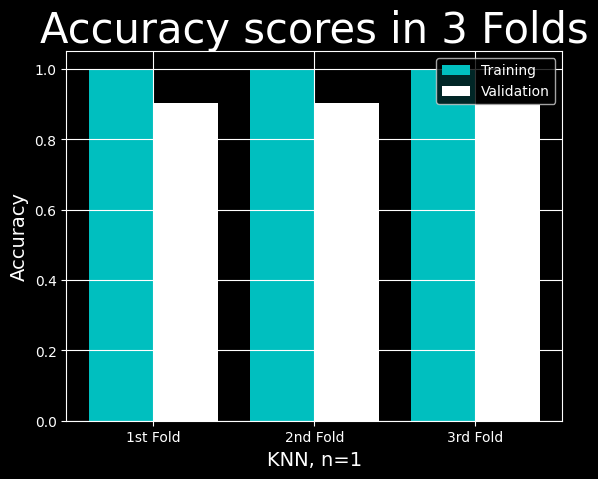

n = 2
{'Training Accuracy scores': array([0.995 , 0.9935, 0.9925]), 'Mean Training Accuracy': 99.36666666666667, 'Validation Accuracy scores': array([0.898, 0.907, 0.894]), 'Mean Validation Accuracy': 89.96666666666667}


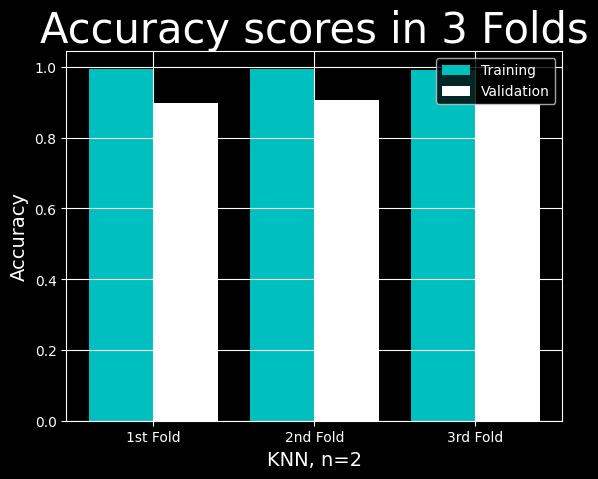

n = 3
{'Training Accuracy scores': array([0.903 , 0.9095, 0.9075]), 'Mean Training Accuracy': 90.66666666666666, 'Validation Accuracy scores': array([0.817, 0.813, 0.794]), 'Mean Validation Accuracy': 80.8}


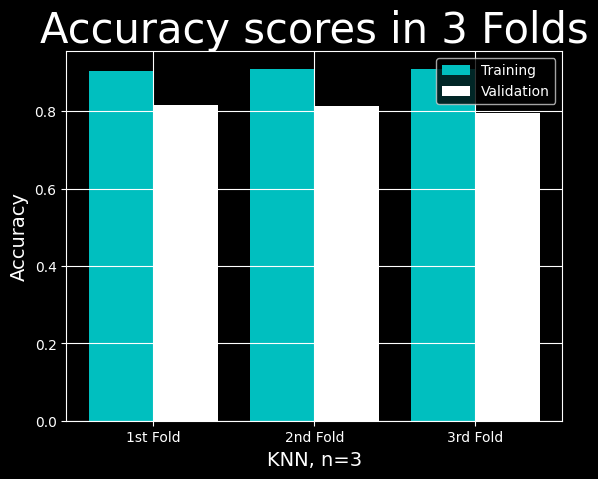

n = 4
{'Training Accuracy scores': array([0.9035, 0.9085, 0.909 ]), 'Mean Training Accuracy': 90.7, 'Validation Accuracy scores': array([0.817, 0.817, 0.797]), 'Mean Validation Accuracy': 81.03333333333333}


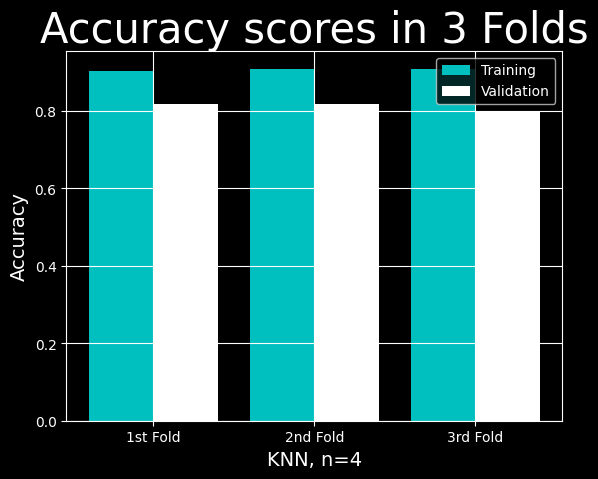

n = 5
{'Training Accuracy scores': array([0.809 , 0.8115, 0.81  ]), 'Mean Training Accuracy': 81.01666666666668, 'Validation Accuracy scores': array([0.771, 0.751, 0.76 ]), 'Mean Validation Accuracy': 76.06666666666668}


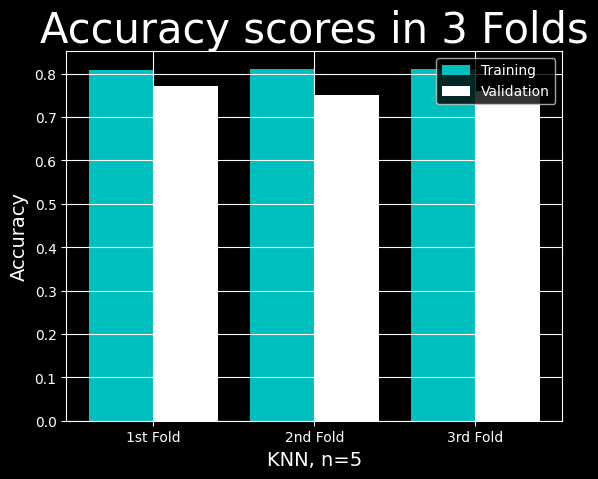

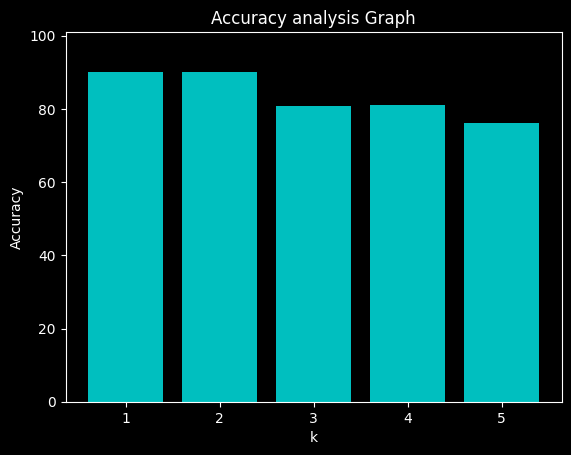

kernel = linear
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.909, 0.9  , 0.89 ]), 'Mean Validation Accuracy': 89.96666666666667}


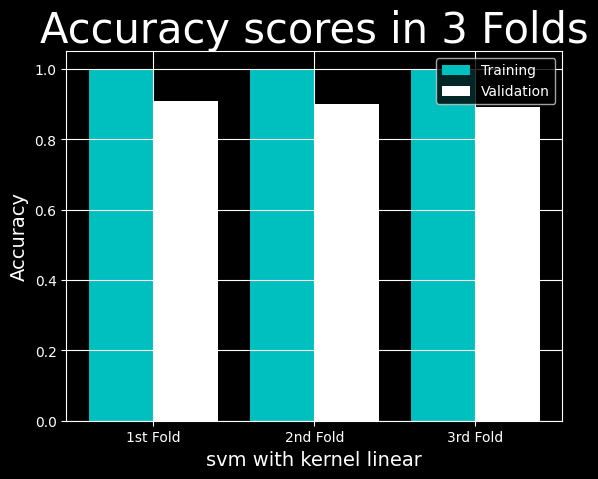

kernel = poly
{'Training Accuracy scores': array([0.998 , 0.9985, 0.9975]), 'Mean Training Accuracy': 99.80000000000001, 'Validation Accuracy scores': array([0.878, 0.884, 0.869]), 'Mean Validation Accuracy': 87.70000000000002}


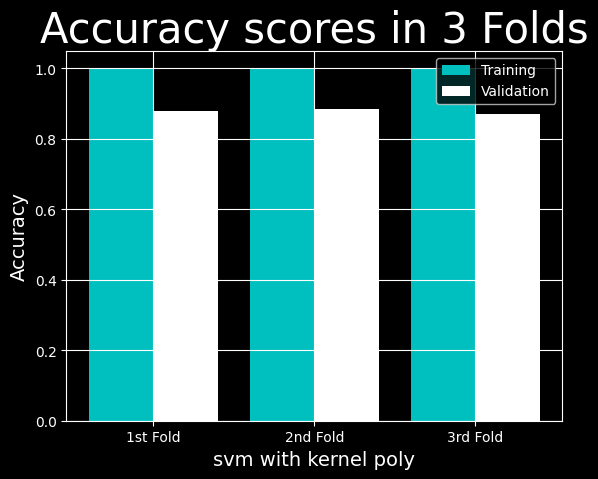

kernel = sigmoid
{'Training Accuracy scores': array([0.558, 0.526, 0.545]), 'Mean Training Accuracy': 54.300000000000004, 'Validation Accuracy scores': array([0.52 , 0.533, 0.51 ]), 'Mean Validation Accuracy': 52.1}


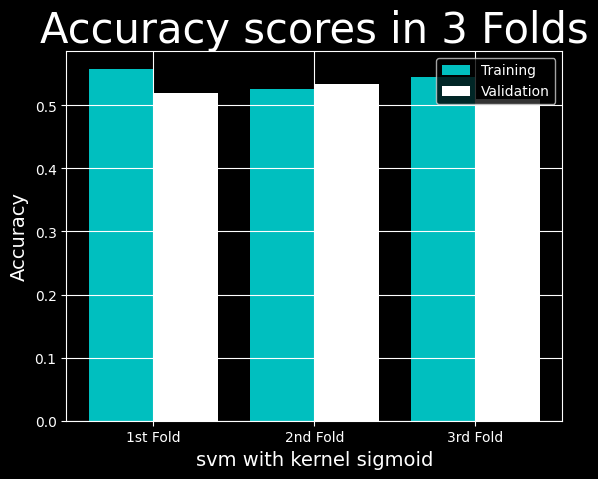

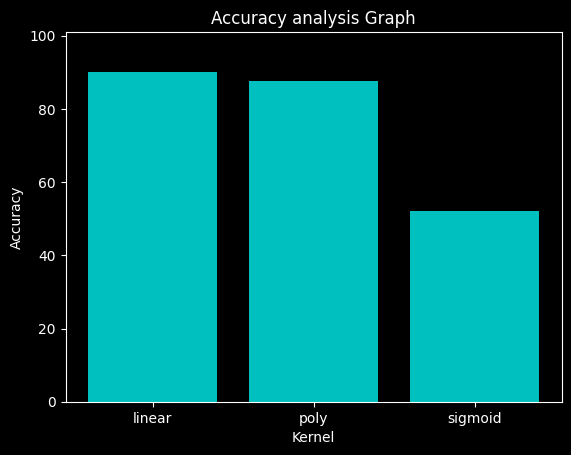

{'Training Accuracy scores': array([0.7005, 0.6865, 0.716 ]), 'Mean Training Accuracy': 70.1, 'Validation Accuracy scores': array([0.675, 0.727, 0.681]), 'Mean Validation Accuracy': 69.43333333333334}


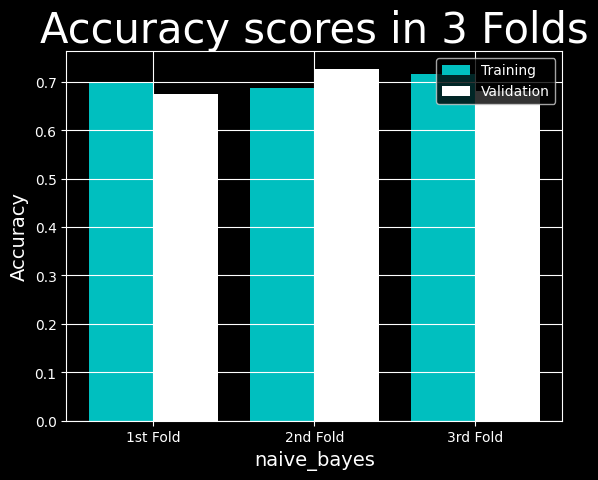

solver = lbfgs
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.911, 0.904, 0.883]), 'Mean Validation Accuracy': 89.93333333333334}


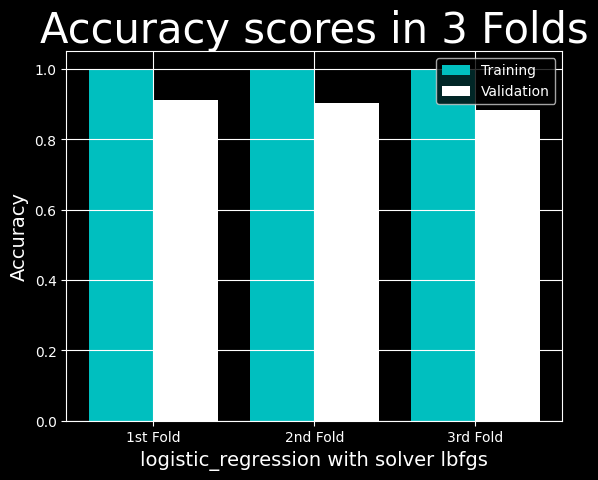

solver = liblinear
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.906, 0.9  , 0.889]), 'Mean Validation Accuracy': 89.83333333333334}


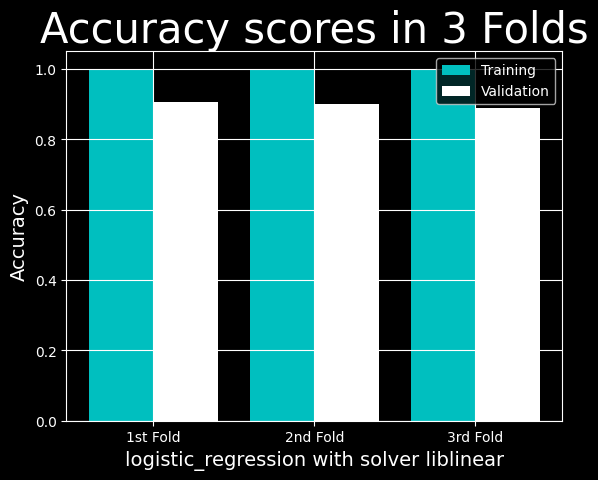

solver = newton-cg
{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.911, 0.903, 0.883]), 'Mean Validation Accuracy': 89.9}


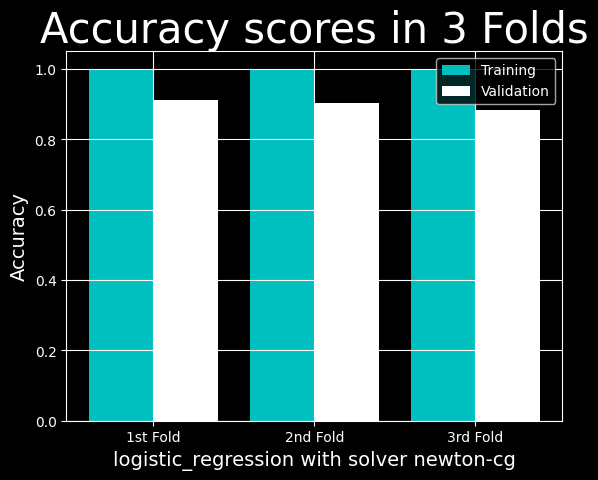

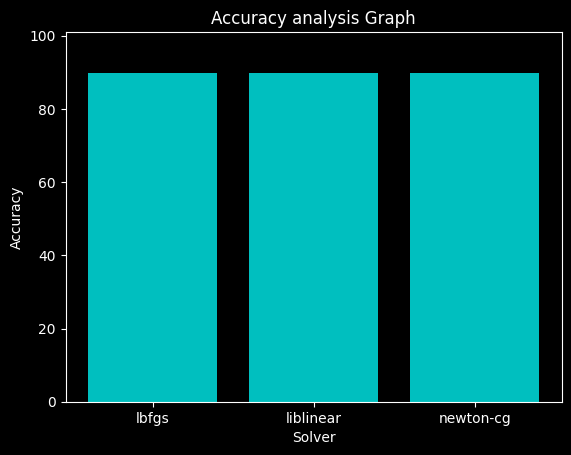

In [ ]:
# k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
# logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
# s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
# n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)
k_n_n_c(datalr, resultlr)
s_v_m_c(datalr, resultlr)
n_b_g_c(datalr, resultlr)
logistic_regression_c(datalr, resultlr)

In [ ]:
del datalr, resultlr

In [ ]:
# Your code goes here

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")
